In [1]:
library(ggplot2)
library(ggrepel)
library(stringr)
library(dplyr)
library(reshape2)
library(ComplexHeatmap)
library("cowplot")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




## Read in data

In [2]:
setwd("~/Dropbox (MIT)/MVH_Code/brq/bd354")
data = read.csv("221029_bd354_cpm_by_gene_mediancorr.csv", row.names=1)
head(data)

DMSO_CD11b_rep1 DMSO_CD11b_rep2 DMSO_GFP_rep1 DMSO_GFP_rep2
0610007P14Rik -0.05995488     -0.04549026      0.11987339   -0.03701771  
0610009B22Rik -0.04695425      0.09568740      0.46498426    0.03843563  
0610009D07Rik  0.15285149     -0.52076913      0.27752229   -0.39146722  
0610009O20Rik  0.17643831      0.08454201     -0.44908279    0.75502509  
0610010F05Rik -0.39816368      0.15951833     -0.06935216    0.45330476  
0610010K14Rik  0.15624075      0.07922638     -0.05858875    0.03176691  
              HU_CD11b_rep1 HU_CD11b_rep2 HU_GFP_rep1 HU_GFP_rep2
0610007P14Rik  0.2880839    -0.1366225    -0.21164510 -0.08413925
0610009B22Rik -0.2753486    -0.5818873    -0.29411358 -0.35326298
0610009D07Rik  0.1255309    -0.1700845     0.76943891 -0.61757145
0610009O20Rik  1.7693871     0.9403395     1.68554900 -0.03381471
0610010F05Rik -0.2100721     0.5777694    -0.27042042  0.28560216
0610010K14Rik -0.3788542    -0.0364954     0.02294738  0.15919672
              APH_CD11b_rep1 APH_CD11b_rep2 APH_GFP_rep1 APH_GFP_rep2
0610007P14Rik  0.03776907    -0.117378419    0.05072053   0.176085101
0610009B22Rik -0.31099521    -0.523379070   -0.39750768  -0.207016418
0610009D07Rik -0.21110727     0.009398698    0.07594651  -0.598008444
0610009O20Rik  1.56517621     1.026553419    0.27234372  -0.101986501
0610010F05Rik -0.09450339     0.035919574    0.15588475  -0.002157627
0610010K14Rik  0.27063188    -0.190878195    0.24703069  -0.325361442
              E2wd_CD11b_rep1 E2wd_CD11b_rep2 E2wd_GFP_rep1 E2wd_GFP_rep2
0610007P14Rik  0.03304350     -0.24823676      0.145006775  -0.1467277   
0610009B22Rik -0.11909537     -0.49971832      0.163367977  -0.8967123   
0610009D07Rik -0.96285529     -0.21626437      0.008180828   0.1202198   
0610009O20Rik  1.37192608      0.45568143      1.511843227   1.2053644   
0610010F05Rik  0.46309111      0.08071736     -0.163721823  -0.1065698   
0610010K14Rik -0.06772726     -0.26700337     -0.205460244  -0.1443067

In [3]:
data_na = data
data_na[data_na == 8] = NA
data_na[data_na == -8] = NA
data_na = data_na[rowSums(is.na(data_na)) < 2, ]
dim(data_na)

[1] 19926    16

In [4]:
inds = seq(2, dim(data)[2], 2)
data_reps_summ = (data_na[,inds-1] + data_na[,inds])/2
colnames(data_reps_summ) = gsub("_rep1", "", colnames(data_reps_summ))
head(data_reps_summ)

DMSO_CD11b  DMSO_GFP    HU_CD11b    HU_GFP       APH_CD11b  
0610007P14Rik -0.05272257  0.04142784  0.07573068 -0.147892176 -0.03980467
0610009B22Rik  0.02436657  0.25170995 -0.42861792 -0.323688280 -0.41718714
0610009D07Rik -0.18395882 -0.05697247 -0.02227683  0.075933727 -0.10085429
0610009O20Rik  0.13049016  0.15297115  1.35486326  0.825867142  1.29586481
0610010F05Rik -0.11932268  0.19197630  0.18384861  0.007590871 -0.02929191
0610010K14Rik  0.11773357 -0.01341092 -0.20767481  0.091072050  0.03987684
              APH_GFP     E2wd_CD11b E2wd_GFP     
0610007P14Rik  0.11340282 -0.1075966 -0.0008604793
0610009B22Rik -0.30226205 -0.3094068 -0.3666721482
0610009D07Rik -0.26103097 -0.5895598  0.0642003101
0610009O20Rik  0.08517861  0.9138038  1.3586038000
0610010F05Rik  0.07686356  0.2719042 -0.1351457877
0610010K14Rik -0.03916538 -0.1673653 -0.1748834597

In [30]:
data["Med12",]

DMSO_CD11b_rep1 DMSO_CD11b_rep2 DMSO_GFP_rep1 DMSO_GFP_rep2 HU_CD11b_rep1
Med12 3.833712        1.1742          -3.762516     1.16631       -1.535433    
      HU_CD11b_rep2 HU_GFP_rep1 HU_GFP_rep2 APH_CD11b_rep1 APH_CD11b_rep2
Med12 0.9403395     0.3698958   -4.812245   0.5042061      0.1013725     
      APH_GFP_rep1 APH_GFP_rep2 E2wd_CD11b_rep1 E2wd_CD11b_rep2 E2wd_GFP_rep1
Med12 0.5353781    -1.549645    1.555436        5.157125        -3.819074    
      E2wd_GFP_rep2
Med12 4.27917

In [14]:
a = subset(data_reps_summ, HU_CD11b < 0 & HU_GFP < 0 & APH_CD11b < 0 & APH_GFP < 0 & (E2wd_CD11b + E2wd_GFP) > -0.5)
a

DMSO_CD11b   DMSO_GFP     HU_CD11b      HU_GFP       APH_CD11b   
1110001J03Rik  0.09844759   0.01300936  -0.0892930967 -0.084601878 -0.362529942
1110032F04Rik -0.02507756   0.38559098  -0.0313689457 -0.108070285 -0.016823370
1700006E09Rik  0.01501020  -0.10048545  -0.1001934156 -0.057754953 -0.239521075
1700007G11Rik -0.07513721  -0.10269083  -0.3244165525 -0.003986114 -0.454466361
1700011I03Rik -0.21942897   0.02886519  -0.2858654367 -0.036810666 -0.045078113
1700016D06Rik  0.06203241  -0.09439810  -0.3483151740 -0.066710052 -0.244181250
1700049G17Rik -0.06039907   0.31792849  -0.0650150821 -0.186419666 -0.343726377
1700080O16Rik -0.10564173  -0.24726866  -0.1424972606 -0.160354362 -0.195333718
1700088E04Rik  0.20283469  -0.04010290  -0.3013879397 -0.325801940 -0.065237909
1810013L24Rik -0.02739733  -0.23995895  -0.3348442173 -0.234033536 -0.297931893
1810046K07Rik  0.01913381  -0.18711449  -0.3487082670 -0.150773031 -0.064640788
2010107G12Rik -0.30322425  -0.15645875  -0.1967089677 -0.002880498 -0.276567638
2010107G23Rik  0.14775946  -0.25069321  -0.3553118100 -0.168814143 -0.351212565
2010111I01Rik -0.08641316  -0.02970504  -0.0901037813 -0.090279392 -0.009880161
2210407C18Rik -0.01925056  -0.01212392  -0.3986494399 -0.097186616 -0.103916069
2310005G13Rik  0.15139305  -0.01151048  -0.1862858826 -0.117759146 -0.113411724
2310022A10Rik -0.01248022  -0.05083558  -0.0490935624 -0.170185284 -0.004360313
2410018M08Rik  0.25885399  -0.06743391  -0.2196435612 -0.274690339 -0.026409337
2410076I21Rik  0.03177064   0.02901558  -0.0256296976 -0.060222653 -0.014844076
3110009E18Rik -0.27317117   0.17871957  -0.0770403253 -0.173711745 -0.258303748
3110052M02Rik  0.05900742   0.07734402  -0.2725772295 -0.039531598 -0.306377392
3110082I17Rik  0.14972353   0.30267742  -0.3372334378 -0.273843879 -0.230233855
3830417A13Rik -0.03005331   0.19191062  -0.1953046529 -0.186674118 -0.220205627
4921517D22Rik -0.24138639  -0.19448694  -0.0853679711 -0.026488373 -0.012837692
4930404A10Rik  0.02326208  -0.05692632  -0.1554598458 -0.216001127 -0.051896017
4930415L06Rik  0.13751057   0.28112410  -0.0009274589 -0.186601897 -0.102657169
4930432K21Rik  0.14079228  -0.03940649  -0.1375832898 -0.021951414 -0.184344838
4930505A04Rik -0.17061814  -0.03601631  -0.0320809680 -0.183522550 -0.002848005
4930506M07Rik -0.11706187   0.23633960  -0.2310507143 -0.075014859 -0.078160646
4930564B18Rik -0.07950353  -0.06936125  -0.0737666499 -0.014217479 -0.048509845
⋮             ⋮            ⋮            ⋮             ⋮            ⋮           
Zfp235        -0.212246994 -0.146515486 -0.067560724  -0.01376795  -0.11540085 
Zfp300         0.136830788 -0.158106788 -0.110075052  -0.16906670  -0.31726270 
Zfp346         0.270809696  0.111420186 -0.041415066  -0.34463761  -0.08448810 
Zfp37         -0.265444587  0.287583066 -0.246864500  -0.15683442  -0.11488084 
Zfp42         -0.211744717 -0.054686284 -0.092420177  -0.23091288  -0.23751200 
Zfp444        -0.168865551 -0.081458781 -0.081426795  -0.05307479  -0.05644792 
Zfp457        -0.058571610 -0.353956123 -0.206934118  -0.13982097  -0.12328123 
Zfp46          0.019201501  0.009093727 -0.127766146  -0.01455854  -0.03263244 
Zfp473        -0.062233944  0.035043001 -0.066536021  -0.08834113  -0.23508721 
Zfp606        -0.027321431  0.016717754 -0.066337671  -0.11334242  -0.50184868 
Zfp608         0.033504191 -0.458358325 -0.385182852  -0.17507381  -0.30395571 
Zfp683         0.104397794 -0.199118258 -0.324827366  -0.37746419  -0.21126088 
Zfp692         0.025311364 -0.111294636 -0.196117941  -0.11209161  -0.06309538 
Zfp763        -0.210257312  0.038770092 -0.012193761  -0.14096306  -0.20352105 
Zfp775        -0.399899327 -0.061760994 -0.188175995  -0.12413486  -0.06279590 
Zfp809         0.285576678  0.134442821 -0.110503695  -0.07260027  -0.06435324 
Zfp819        -0.153734413 -0.008502851 -0.216922438  -0.20143371  -0.12760050 
Zfp85-rs1     -0.265708189 -0.078178380 -0.071290127  -0.02011951  -0.29974617 
Zfp870        

Warning message:
“Removed 33 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 83 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


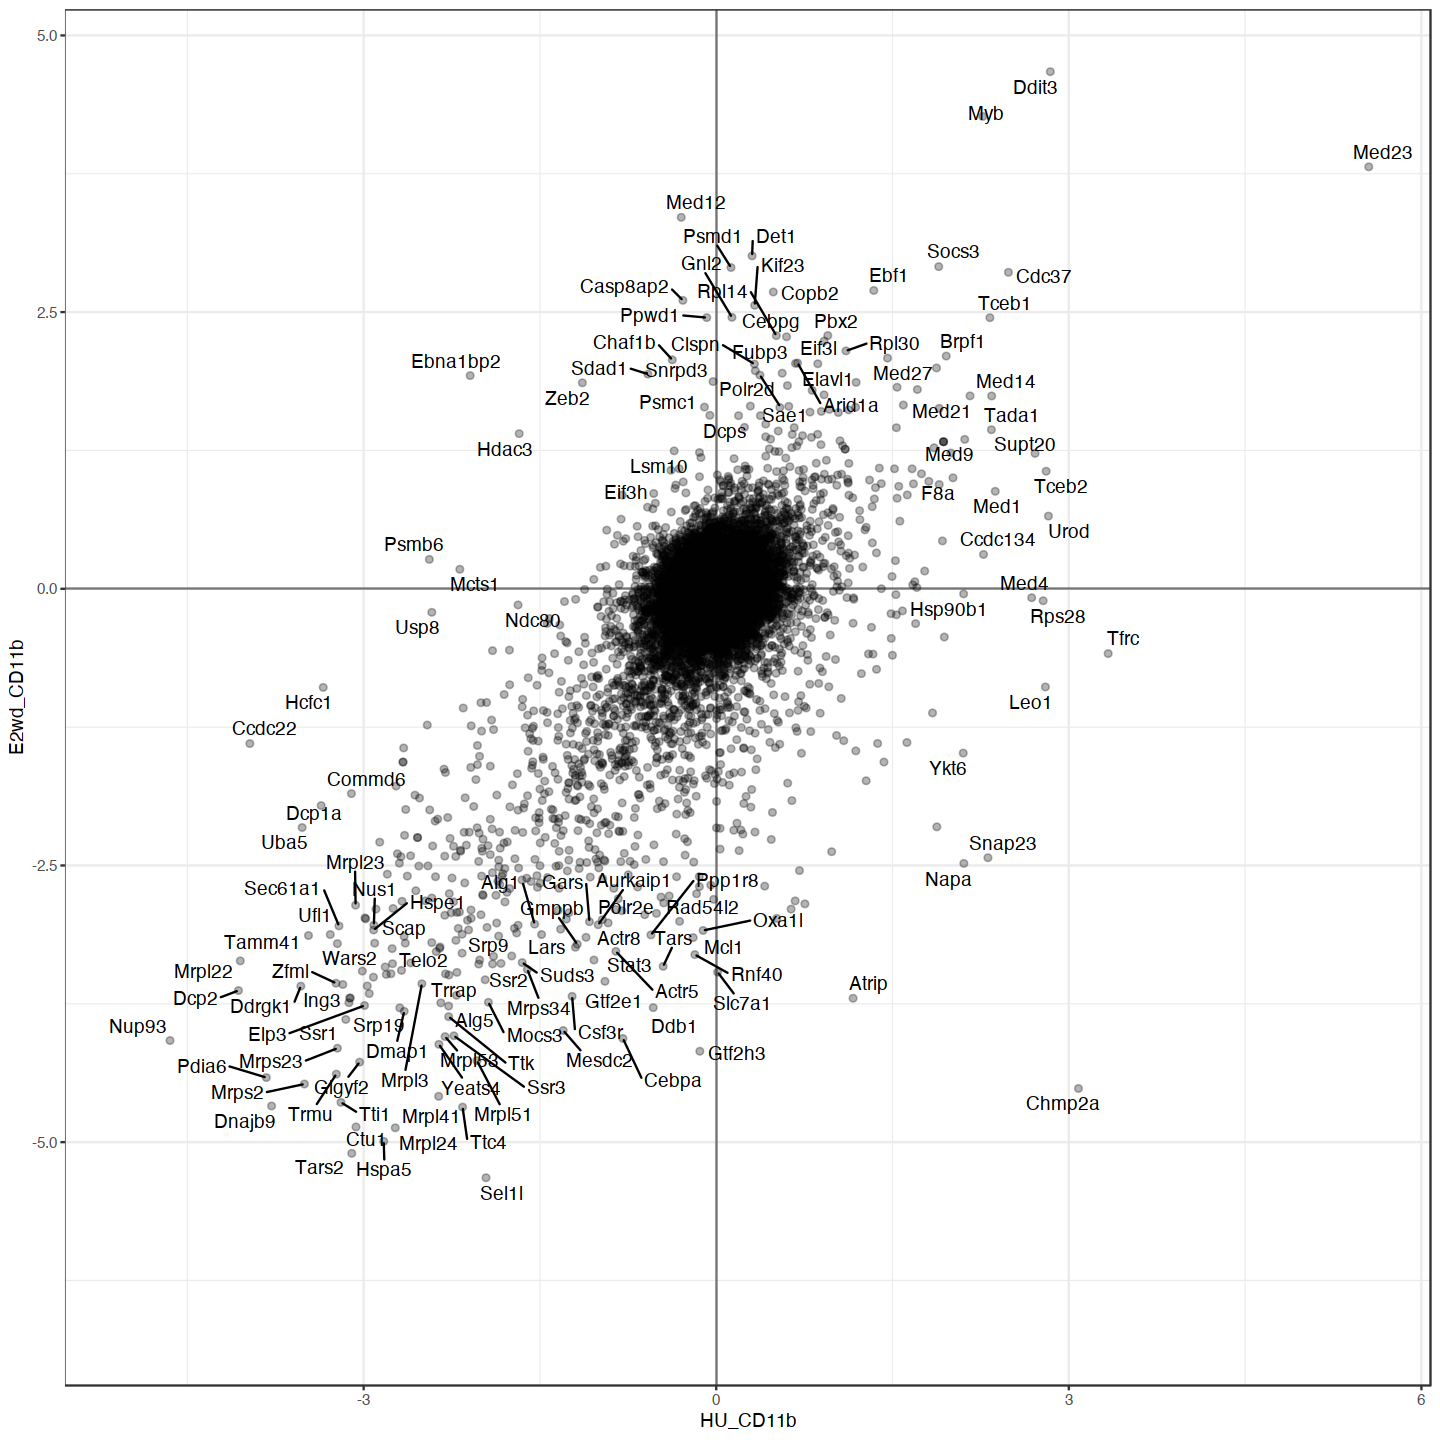

In [5]:
options(repr.plot.width=12, repr.plot.height=12)

to_label = subset(data_reps_summ, HU_CD11b > 2 | E2wd_CD11b > 2 | HU_CD11b - E2wd_CD11b < -1.5 | HU_CD11b < -3 | E2wd_CD11b < -3)
to_label$gene = row.names(to_label)
ggplot(data_reps_summ, aes(x=HU_CD11b, y=E2wd_CD11b)) + geom_point(alpha=0.3) +
theme_bw() + geom_hline(yintercept=0, alpha=0.5) +
    geom_vline(xintercept=0, alpha=0.5) +
    geom_text_repel(data=to_label, aes(x=HU_CD11b, y=E2wd_CD11b, label=gene), max.overlaps=20)

Warning message:
“Removed 27 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 66 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


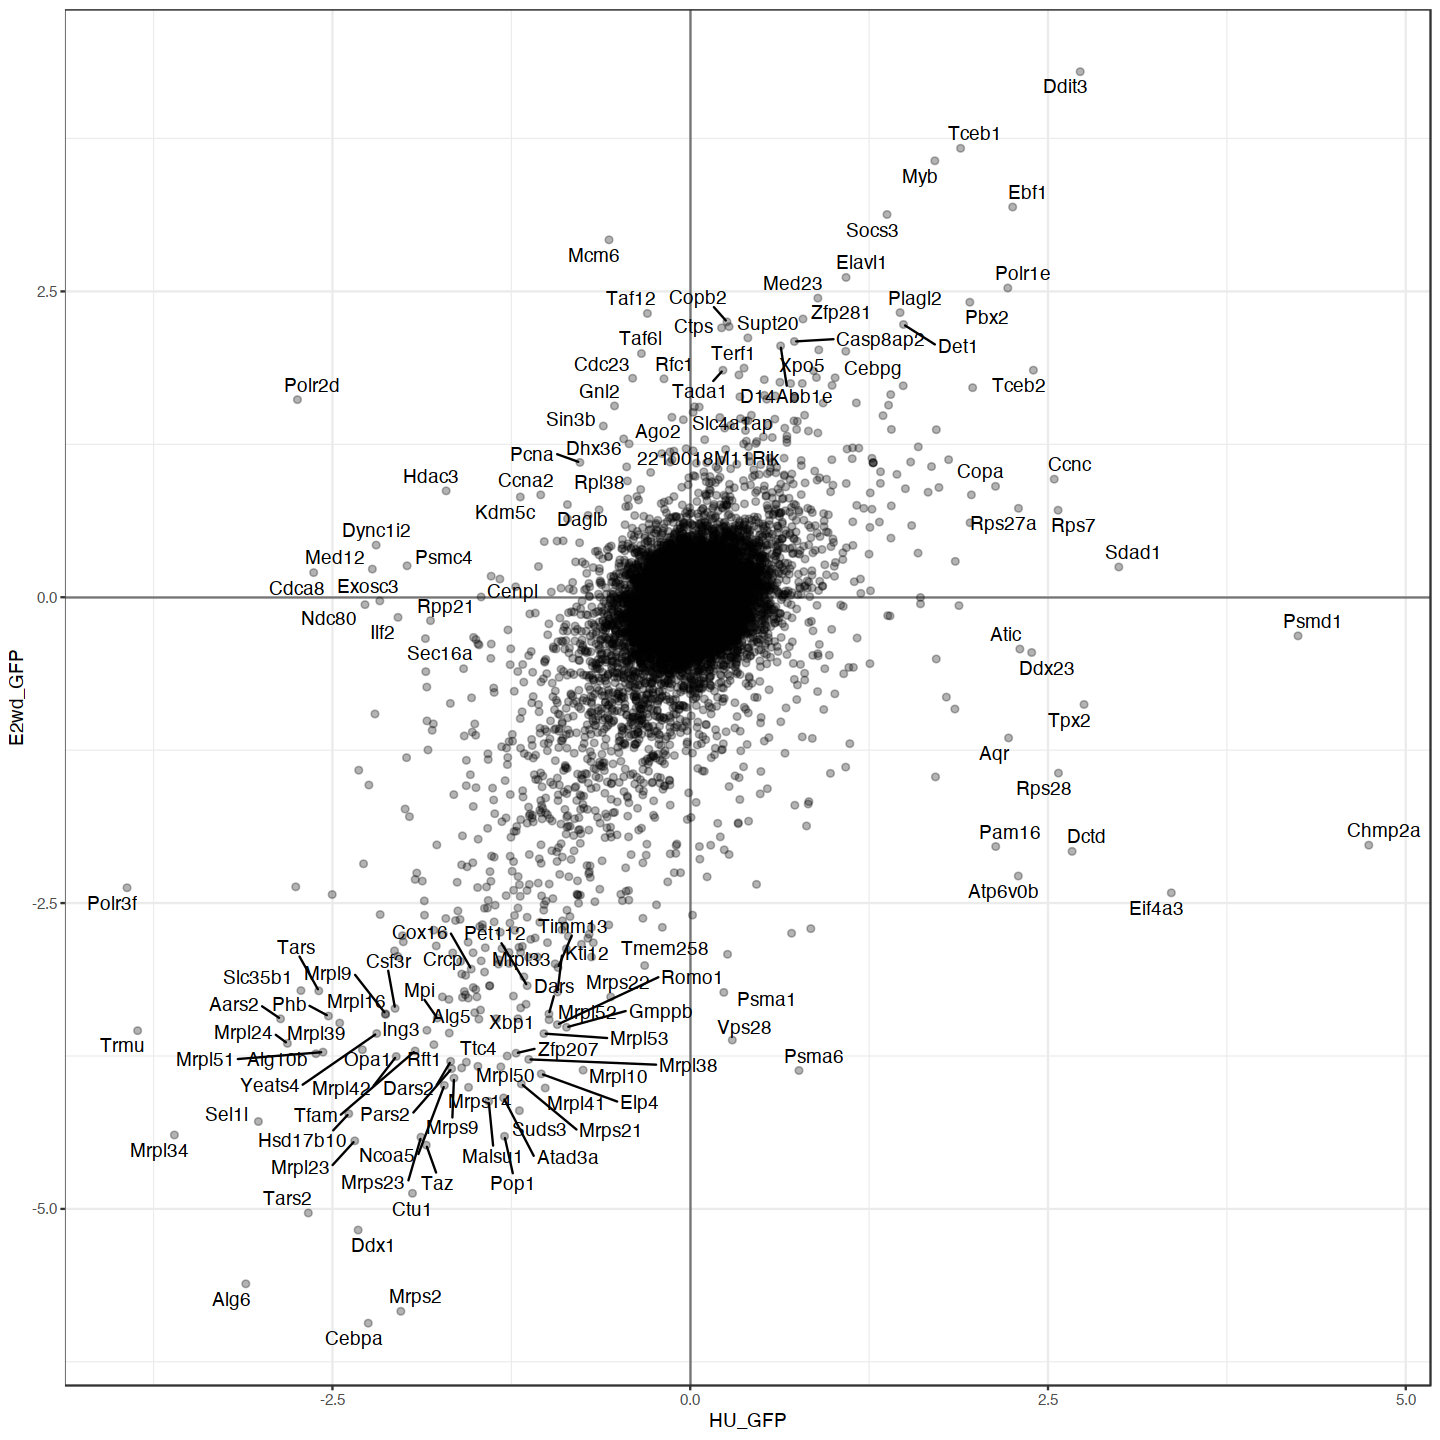

In [6]:
options(repr.plot.width=12, repr.plot.height=12)

to_label = subset(data_reps_summ, HU_GFP > 2 | E2wd_GFP > 2 | HU_GFP - E2wd_GFP < -1.5 | HU_GFP < -3 | E2wd_GFP < -3)
to_label$gene = row.names(to_label)
ggplot(data_reps_summ, aes(x=HU_GFP, y=E2wd_GFP)) + geom_point(alpha=0.3) +
theme_bw() + geom_hline(yintercept=0, alpha=0.5) +
    geom_vline(xintercept=0, alpha=0.5) +
    geom_text_repel(data=to_label, aes(x=HU_GFP, y=E2wd_GFP, label=gene), max.overlaps=20)

In [7]:
with(data_reps_summ, cor(HU_GFP + HU_CD11b, E2wd_GFP + E2wd_CD11b))

[1] NA

Warning message:
“Removed 60 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 80 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


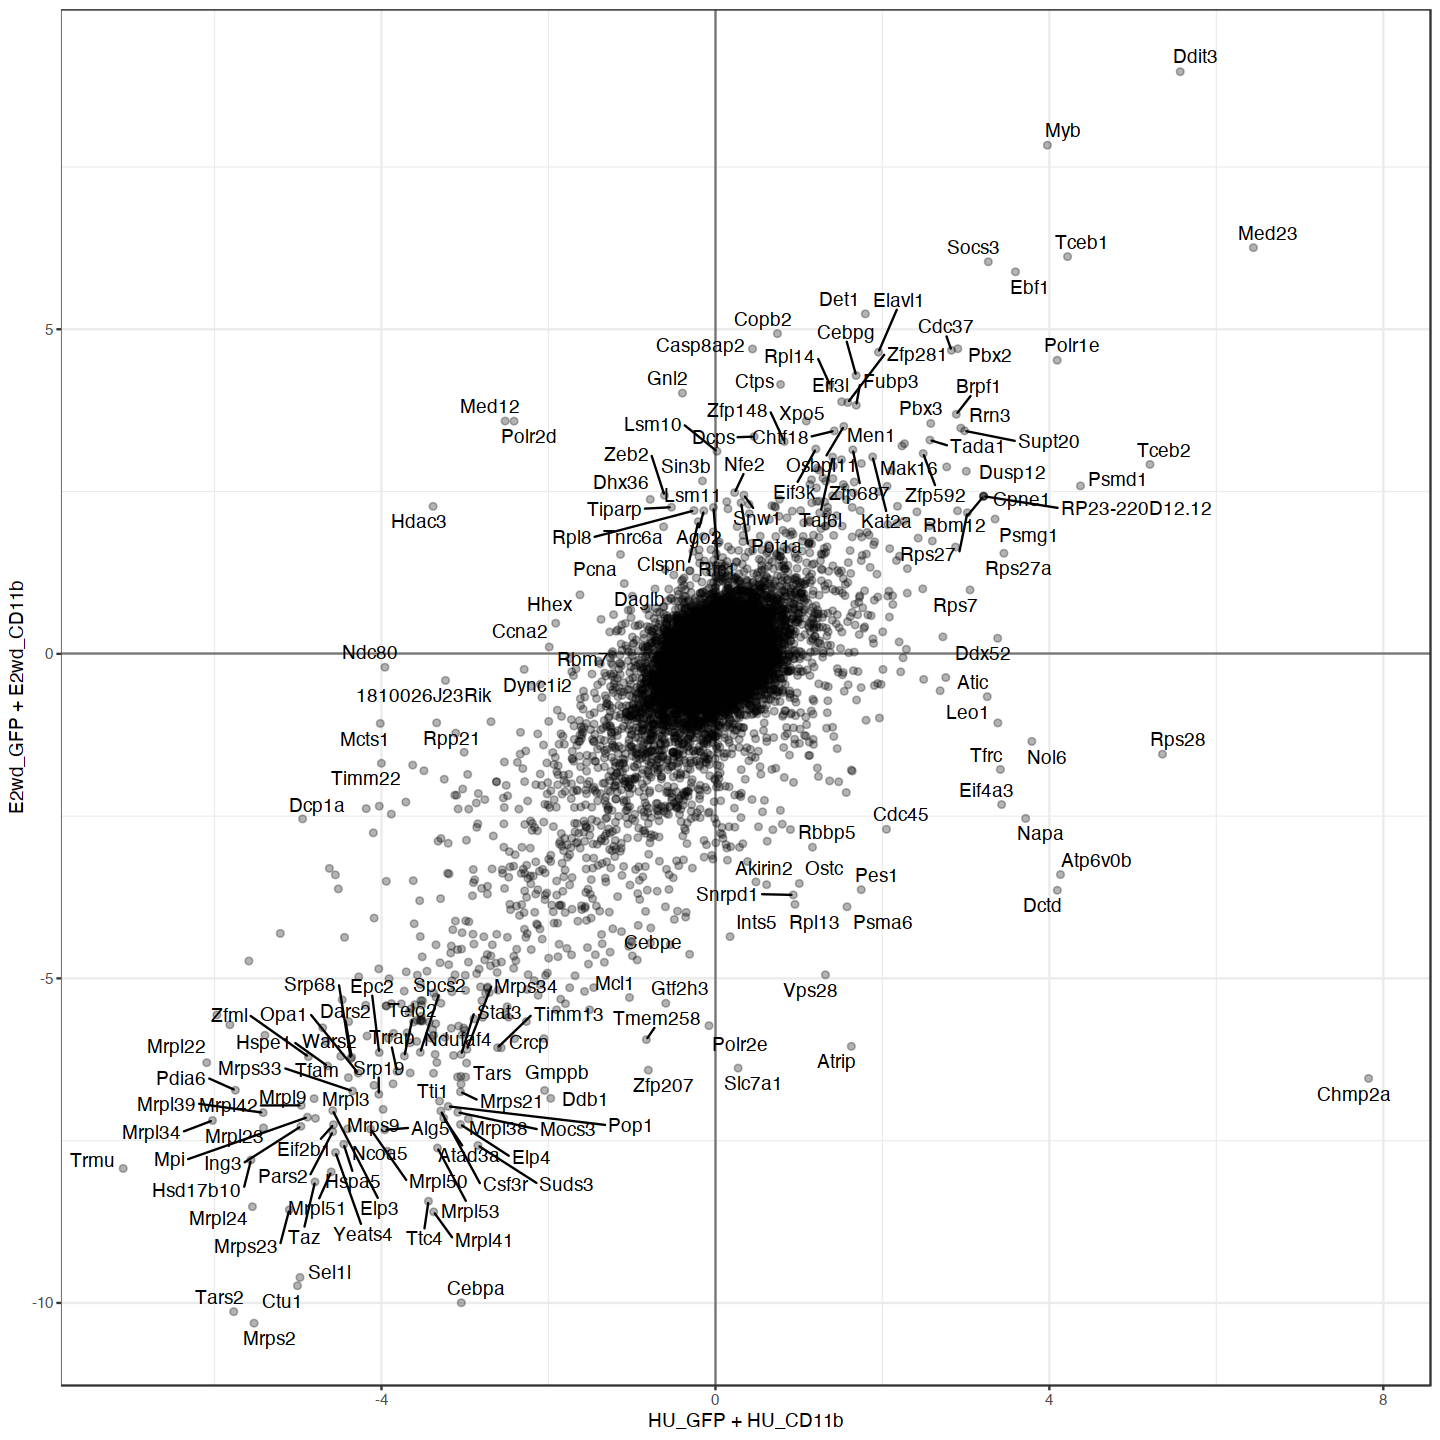

In [71]:
options(repr.plot.width=12, repr.plot.height=12)

to_label = subset(data_reps_summ, HU_GFP + HU_CD11b > 3 | E2wd_GFP + E2wd_CD11b > 3 | 
                                  HU_GFP + HU_CD11b - (E2wd_GFP + E2wd_CD11b) < -2 | 
                                  HU_GFP + HU_CD11b - (E2wd_GFP + E2wd_CD11b) > 4 |
                                  HU_GFP + HU_CD11b < -6 | E2wd_GFP + E2wd_CD11b < -6)
to_label$gene = row.names(to_label)
ggplot(data_reps_summ, aes(x=HU_GFP + HU_CD11b, y=E2wd_GFP + E2wd_CD11b)) + geom_point(alpha=0.3) +
theme_bw() + geom_hline(yintercept=0, alpha=0.5) +
    geom_vline(xintercept=0, alpha=0.5) +
   geom_text_repel(data=to_label, aes(x=HU_GFP + HU_CD11b, y=E2wd_GFP + E2wd_CD11b, label=gene), max.overlaps=20)

Warning message:
“Removed 18 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_text_repel).”


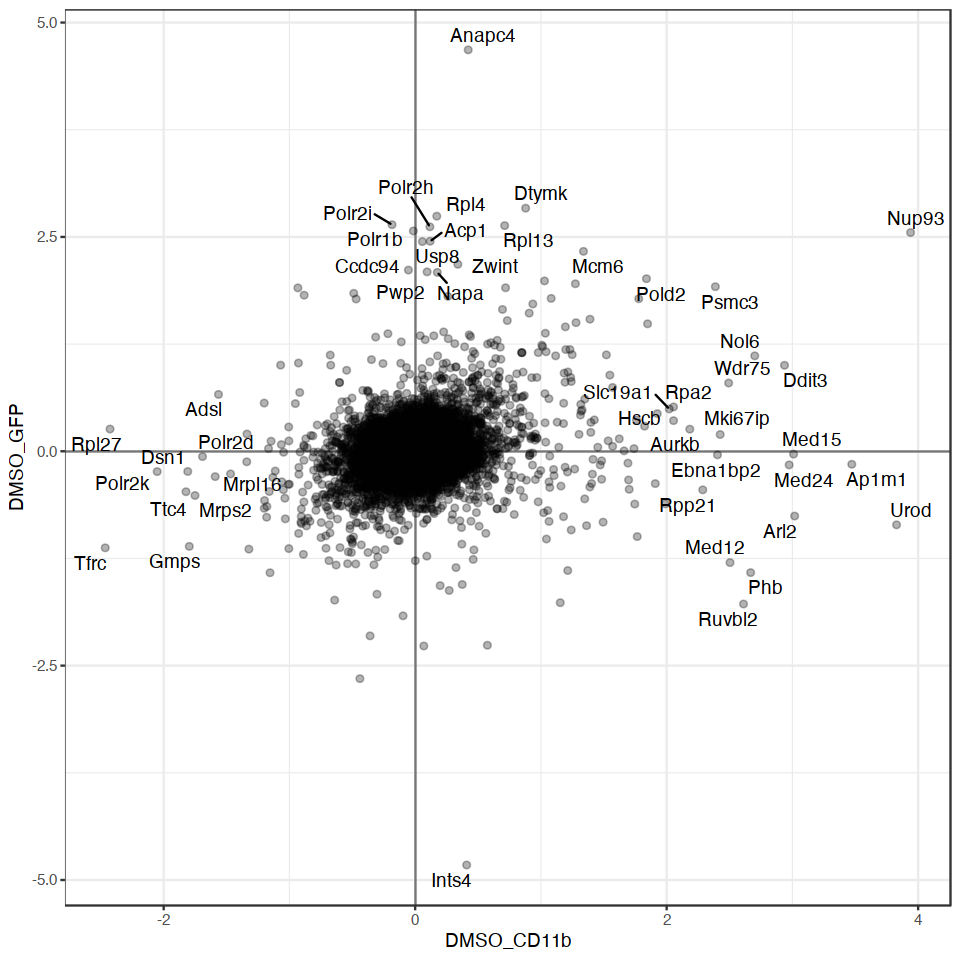

In [8]:
options(repr.plot.width=8, repr.plot.height=8)

to_label = subset(data_reps_summ, DMSO_GFP > 2 | DMSO_CD11b > 2 | DMSO_GFP < -3 | DMSO_CD11b < -1.5)
to_label$gene = row.names(to_label)
ggplot(data_reps_summ, aes(x=DMSO_CD11b, y=DMSO_GFP)) + geom_point(alpha=0.3) +
theme_bw() + geom_hline(yintercept=0, alpha=0.5) +
    geom_vline(xintercept=0, alpha=0.5) +
    geom_text_repel(data=to_label, aes(x=DMSO_CD11b, y=DMSO_GFP, label=gene), max.overlaps=20)

In [37]:
dmso_hits = with(data_reps_summ, DMSO_CD11b + DMSO_GFP)
names(dmso_hits) = row.names(data_reps_summ)
z = names(dmso_hits[dmso_hits > 1])
z[!is.na(z)]

websiteLive <- TRUE
dbs <- c("GO_Molecular_Function_2015", "GO_Cellular_Component_2015", "GO_Biological_Process_2015")
if (websiteLive) {
    enriched <- enrichr(z[!is.na(z)], dbs)
}

[1] "6030458C11Rik"  "Abcc1"          "Abcd4"          "Acly"          
  [5] "Acp1"           "Ak2"            "Anapc4"         "Ankrd52"       
  [9] "Ap1m1"          "Ap2a1"          "Arid1a"         "Arl2"          
 [13] "Atmin"          "Aurkb"          "BC027231"       "Bap1"          
 [17] "Birc5"          "Bms1"           "Bora"           "Brpf1"         
 [21] "Btbd1"          "Casp8ap2"       "Ccdc101"        "Ccdc86"        
 [25] "Ccdc94"         "Ccna2"          "Ccnc"           "Cct5"          
 [29] "Cd2bp2"         "Cd34"           "Cdc25a"         "Cdc45"         
 [33] "Cdc6"           "Cdc7"           "Cdk1"           "Cdk11b"        
 [37] "Chtf18"         "Cirh1a"         "Clns1a"         "Cnot1"         
 [41] "Cog1"           "Cog6"           "Copa"           "Cpne1"         
 [45] "Cs"             "Ctnnbl1"        "Ctps"           "Cyb5b"         
 [49] "D14Abb1e"       "D2Wsu81e"       "Dcps"           "Dctn6"         
 [53] "Ddit3"          "Ddx19a"         "Ddx3x"          "Det1"          
 [57] "Dgcr14"         "Dgcr8"          "Dhfr"           "Dicer1"        
 [61] "Dlat"           "Dnaja3"         "Dnajc9"         "Dtymk"         
 [65] "Dut"            "E4f1"           "Eapp"           "Ebf1"          
 [69] "Ebna1bp2"       "Ecd"            "Eftud1"         "Eif3d"         
 [73] "Eif3f"          "Eif3m"          "Elavl1"         "Esrra"         
 [77] "Exoc4"          "Exosc2"         "Fam118a"        "Fam122a"       
 [81] "Fam58b"         "Fam92a"         "Fdps"           "Fdx1l"         
 [85] "Fxn"            "G6pdx"          "Gale"           "Gcsh"          
 [89] "Gins2"          "Gosr2"          "Gpatch1"        "Gpx4"          
 [93] "Hnrnpl"         "Hoxa9"          "Hscb"           "Hsd17b7"       
 [97] "Hus1"           "Iba57"          "Idi1"           "Impdh2"        
[101] "Ing5"           "Insig1"         "Ints3"          "Ints5"         
[105] "Ints8"          "Irf7"           "Isy1"           "Kat2a"         
[109] "Kif23"          "Kit"            "Lipa"           "Lipt2"         
[113] "Lsm11"          "Lsm14a"         "Mastl"          "Max"           
[117] "Mcm6"           "Meaf6"          "Med12"          "Med15"         
[121] "Med22"          "Med23"          "Med24"          "Med4"          
[125] "Med7"           "Men1"           "Mki67ip"        "Mms22l"        
[129] "Msto1"          "Mtbp"           "Mtr"            "Mvd"           
[133] "Myb"            "Mylip"          "Naa38"          "Napa"          
[137] "Nat10"          "Nbn"            "Ncbp1"          "Ncoa3"         
[141] "Ncoa6"          "Nedd1"          "Nob1"           "Nol6"          
[145] "Nol9"           "Nsdhl"          "Nup43"          "Nup93"         
[149] "Nup98"          "Ogdh"           "Paics"          "Pappa"         
[153] "Pbx2"           "Pdcd7"          "Pdha1"          "Pes1"          
[157] "Pex16"          "Pex5"           "Phb"            "Pias1"         
[161] "Picalm"         "Pnkp"           "Pola1"          "Pold2"         
[165] "Pold3"          "Pole"           "Pole2"          "Polr1a"        
[169] "Polr1b"         "Polr1e"         "Polr2h"         "Polr2i"        
[173] "Ppcs"           "Ppp1r11"        "Ppp1r7"         "Prmt5"         
[177] "Prpf19"         "Prpf4"          "Psmc3"          "Psmc5"         
[181] "Psmd4"          "Psmg1"          "Psmg2"          "Pwp2"          
[185] "RP23-220D12.12" "RPL24"          "Racgap1"        "Rad51"         
[189] "Rad51c"         "Rbbp5"          "Rbm12"          "Rbm27"         
[193] "Rcc1"           "Rfc1"           "Rfc4"           "Riok1"         
[197] "Rnaseh2b"       "Rnaseh2c"       "Rnf20"          "Rnf40"         
[201] "Rpa2"           "Rpl13"          "Rpl14"          "Rpl15"         
[205] "Rpl35"          "Rpl4"           "Rpl7"           "Rpl7a"         
[209] "Rplp2"          "Rpp21"          "Rps15"          "Rps17"         
[213] "Rps19bp1"       "Rrm1"           "Rrp15"          "Rrp36"         
[217] 

ERROR: Error in enrichr(z[!is.na(z)], dbs): could not find function "enrichr"


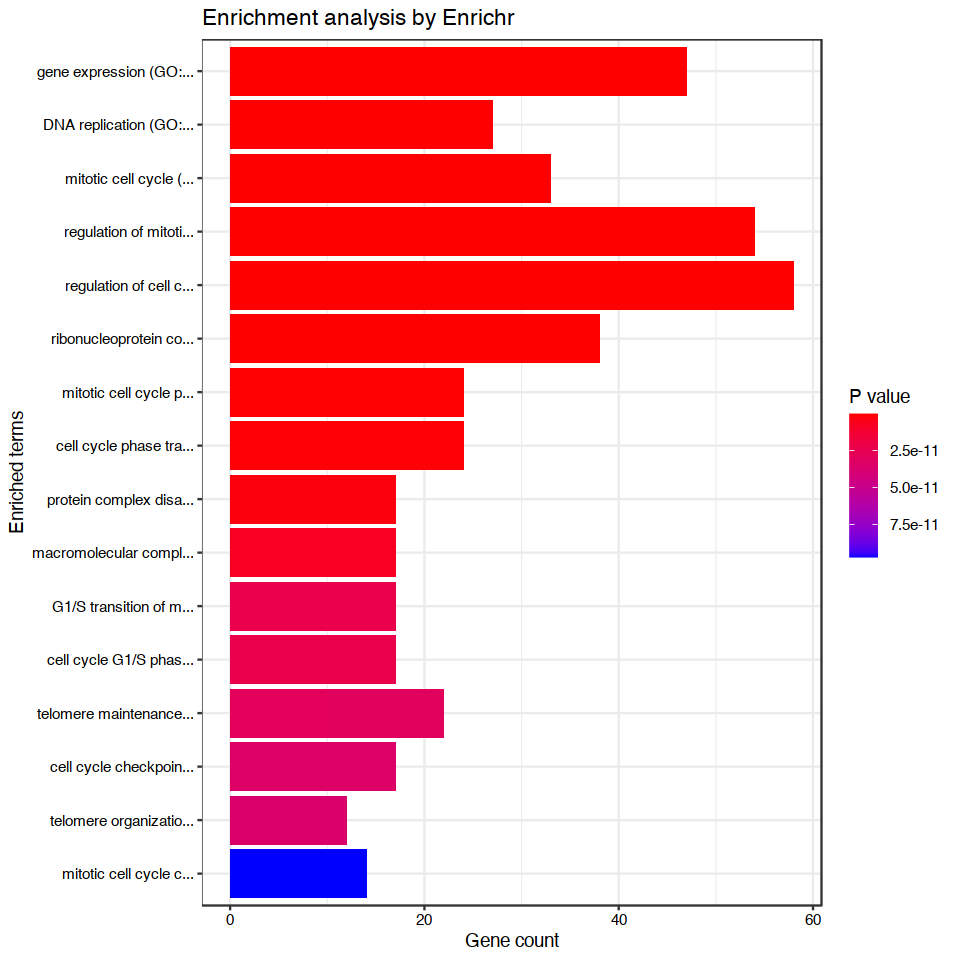

In [12]:
plotEnrich(enriched[[3]], showTerms = 20, numChar = 20, y = "Odds.Ratio", orderBy = "P.value")

In [132]:
z

Term                                                                           
1    translation (GO:0006412)                                                       
2    gene expression (GO:0010467)                                                   
3    tRNA metabolic process (GO:0006399)                                            
4    ncRNA metabolic process (GO:0034660)                                           
5    tRNA aminoacylation (GO:0043039)                                               
6    amino acid activation (GO:0043038)                                             
7    tRNA aminoacylation for protein translation (GO:0006418)                       
8    respiratory electron transport chain (GO:0022904)                              
9    electron transport chain (GO:0022900)                                          
10   DNA-templated transcription, elongation (GO:0006354)                           
11   tRNA processing (GO:0008033)                                                   
12   mitochondrial electron transport, NADH to ubiquinone (GO:0006120)              
13   ncRNA processing (GO:0034470)                                                  
14   transcription from RNA polymerase III promoter (GO:0006383)                    
15   mitochondrial RNA metabolic process (GO:0000959)                               
16   generation of precursor metabolites and energy (GO:0006091)                    
17   transcription elongation from RNA polymerase II promoter (GO:0006368)          
18   mRNA processing (GO:0006397)                                                   
19   cellular amino acid metabolic process (GO:0006520)                             
20   dolichol-linked oligosaccharide biosynthetic process (GO:0006488)              
21   DNA-templated transcription, termination (GO:0006353)                          
22   RNA splicing (GO:0008380)                                                      
23   ribonucleoprotein complex subunit organization (GO:0071826)                    
24   protein N-linked glycosylation via asparagine (GO:0018279)                     
25   ribonucleoprotein complex assembly (GO:0022618)                                
26   peptidyl-asparagine modification (GO:0018196)                                  
27   regulation of translation (GO:0006417)                                         
28   histone modification (GO:0016570)                                              
29   covalent chromatin modification (GO:0016569)                                   
30   mitochondrion organization (GO:0007005)                                        
⋮    ⋮                                                                              
2301 tissue morphogenesis (GO:0048729)                                              
2302 cell projection morphogenesis (GO:0048858)                                     
2303 extracellular matrix organization (GO:0030198)                                 
2304 regulation of hormone levels (GO:0010817)                                      
2305 secretion by cell (GO:0032940)                                                 
2306 extracellular structure organization (GO:0043062)                              
2307 lipid catabolic process (GO:0016042)                                           
2308 divalent metal ion transport (GO:0070838)                                      
2309 divalent inorganic cation transport (GO:0072511)                               
2310 regulation of synaptic transmission (GO:0050804)                               
2311 regionalization (GO:0003002)                                                   
2312 multicellular organismal reproductive process (GO:0048609)                     
2313 small GTPase mediated signal transduction (GO:0007264)                         
2314 pattern specification process (GO:0007389)                                     
2315 actin cytoskeleton organization (GO:0030036)                                   
2316 regul

In [31]:
## Combine with K562 and THP-1 hits

k562 = read.table("~/Dropbox (MIT)/MVH_Code/brq/perturb_figure/data/220517_recalc_diff_scores.csv", header = TRUE, row.names=1, sep = ",")
head(k562)

UMI_count_unfiltered num_cells_unfiltered
4844_MARCH3_P1P2_ENSG00000173926 12022.34              67                 
4845_MARCH5_P1P2_ENSG00000198060 11084.40             190                 
4846_MARCH6_P1P2_ENSG00000145495 11709.98             113                 
4847_MARCH7_P1P2_ENSG00000136536 10936.08             167                 
4848_MARCH8_P1P2_ENSG00000165406 11845.71             224                 
4849_MARCH9_P1P2_ENSG00000139266 11306.06              52                 
                                 num_cells_filtered control_expr fold_expr 
4844_MARCH3_P1P2_ENSG00000173926  61                0.0640519    0.44247630
4845_MARCH5_P1P2_ENSG00000198060 184                0.2381251    0.06842397
4846_MARCH6_P1P2_ENSG00000145495 108                1.1443356    0.30140105
4847_MARCH7_P1P2_ENSG00000136536 159                0.8921829    0.35722190
4848_MARCH8_P1P2_ENSG00000165406 219                0.1425034    0.12055206
4849_MARCH9_P1P2_ENSG00000139266  51                0.1569212    0.00000000
                                 pct_expr   core_control mean_leverage_score
4844_MARCH3_P1P2_ENSG00000173926 -0.5575237 FALSE        0.61292062         
4845_MARCH5_P1P2_ENSG00000198060 -0.9315760 FALSE        0.20354963         
4846_MARCH6_P1P2_ENSG00000145495 -0.6985990 FALSE        0.43920313         
4847_MARCH7_P1P2_ENSG00000136536 -0.6427781 FALSE        0.42422490         
4848_MARCH8_P1P2_ENSG00000165406 -0.8794479 FALSE        0.21939775         
4849_MARCH9_P1P2_ENSG00000139266 -1.0000000 FALSE        0.00967006         
                                 std_leverage_score energy_test_p_value ⋯
4844_MARCH3_P1P2_ENSG00000173926 1.2402502          0.00010000          ⋯
4845_MARCH5_P1P2_ENSG00000198060 0.9263262          0.37166283          ⋯
4846_MARCH6_P1P2_ENSG00000145495 0.9842955          0.07489251          ⋯
4847_MARCH7_P1P2_ENSG00000136536 1.0890418          0.00019998          ⋯
4848_MARCH8_P1P2_ENSG00000165406 1.0841648          0.01909809          ⋯
4849_MARCH9_P1P2_ENSG00000139266 0.8540450          0.23207679          ⋯
                                 mitopercent TE_ratio   cnv_score_z
4844_MARCH3_P1P2_ENSG00000173926 0.1213135   0.01540483  4.5945957 
4845_MARCH5_P1P2_ENSG00000198060 0.1171839   0.01402528 -0.6814639 
4846_MARCH6_P1P2_ENSG00000145495 0.1188708   0.01412516  1.4830395 
4847_MARCH7_P1P2_ENSG00000136536 0.1195118   0.01396995  0.6220123 
4848_MARCH8_P1P2_ENSG00000165406 0.1128392   0.01358630  0.2720817 
4849_MARCH9_P1P2_ENSG00000139266 0.1232514   0.01403618 -1.5692277 
                                 n_genes_by_counts total_counts total_counts_mt
4844_MARCH3_P1P2_ENSG00000173926 8248              13113.13     0              
4845_MARCH5_P1P2_ENSG00000198060 8248              11374.78     0              
4846_MARCH6_P1P2_ENSG00000145495 8248              12198.54     0              
4847_MARCH7_P1P2_ENSG00000136536 8248              11433.88     0              
4848_MARCH8_P1P2_ENSG00000165406 8248              12089.65     0              
4849_MARCH9_P1P2_ENSG00000139266 8244              11512.12     0              
                                 pct_counts_mt gene  Erythrocyte.Score
4844_MARCH3_P1P2_ENSG00000173926 0             3-Mar  0.35268968      
4845_MARCH5_P1P2_ENSG00000198060 0             5-Mar  0.05766553      
4846_MARCH6_P1P2_ENSG00000145495 0             6-Mar -0.02481387      
4847_MARCH7_P1P2_ENSG00000136536 0             7-Mar -0.09023128      
4848_MARCH8_P1P2_ENSG00000165406 0             8-Mar -0.05839402      
4849_MARCH9_P1P2_ENSG00000139266 0             9-Mar -0.08923387      
                                 Granulocyte.Score
4844_MARCH3_P1P2_ENSG00000173926  0.25707194      
4845_MARCH5_P1P2_ENSG00000198060  0.01334797      
4846_MARCH6_P1P2_ENSG00000145495  0.10224652      
4847_MARCH7_P1P2_ENSG00000136536  0.01896099      
4848_MARCH8_P1P2_ENSG00000165406  0.02276786      
4849_MARCH9_P1P2_ENSG00000139266 -0.11090920

In [32]:
k562_bd246 = read.csv("~/Dropbox (MIT)/MVH_Code/brq/bd246/220621_bd246_scores.csv")
head(k562_bd246)

X      K562_BRQ_CD235a K562_DMSO_CD235a K562_DMSO_CD61 K562_HU_CD235a
1 AAAS    0.05485252      0.13211118      -0.05426134     0.38992402   
2 AARS   -3.10920751     -1.65573943       0.56456389    -2.51744467   
3 AATF   -0.52609040     -0.03169657      -0.17866801    -0.58163320   
4 ABCB11  0.01400974     -0.27590759       0.01832421     0.07664699   
5 ABCB7  -1.46830021     -0.04242917       1.78636229    -1.52709386   
6 ABL2    0.02257458     -0.04875061      -0.07241904    -0.09724926   
  K562_PMA_CD235a THP.1_BRQ_CD11b THP.1_BRQ_CD14 THP.1_DMSO_CD11b
1  0.2818845      -0.3797373      -0.43556066    -0.5641102      
2 -0.2791776      -0.5187658      -0.19170948     0.6584614      
3 -1.2819267       2.0748527       1.03348476     1.6071135      
4 -0.5551893       0.1619750      -0.03798557    -0.2789729      
5  0.1434118       1.6372724       1.49263426     1.9486408      
6  0.1048247      -0.0599256       0.05929872    -0.2036700      
  THP.1_DMSO_CD14 THP.1_HU_CD11b THP.1_HU_CD14 THP.1_PMA_CD14
1 -0.3325847      -0.4281724     -0.42109635    0.1785480    
2  0.3194740      -1.4261259      0.05248858   -1.0643851    
3  1.2317862       0.1401243      0.01210712    0.2886013    
4  0.1256155       0.1815875     -0.14511022   -0.2379503    
5  2.2867680       0.5406717      0.47866627    0.5678399    
6 -0.2516494      -0.0317496      0.08713256    0.1719256

In [33]:
thp1 = read.csv("~/Dropbox (MIT)/MVH_Code/brq/bd191 thp1 crispr screen/220304_bd191_combined.csv")
head(thp1)

X gene    cd14        cd11b_rep1  cd11b_rep2  cd11b       wang_cd14  
1 1 A1BG    -0.19765291  0.03121327  0.08643024  0.05882175 -0.20363817
2 2 A1CF     0.03556124  0.15530224  0.51676863  0.33603544 -0.08139689
3 3 A2M      0.09340395 -0.25058654 -0.28703322 -0.26880988 -0.24820175
4 4 A2ML1    0.06697864 -0.21935723  0.31939049  0.05001663  0.45401562
5 5 A3GALT2  0.13424220 -0.40780460 -0.48065399 -0.44422930 -0.09509120
6 6 A4GALT  -0.21474587  0.07243122  0.16861148  0.12052135  0.29033641
  wang_cd11b 
1 -0.01337358
2  0.33006243
3 -0.29619437
4 -0.80503049
5 -0.03235995
6  0.15779127

In [34]:
k562_hits = subset(k562, Erythrocyte.Score > 0.5)$gene
k562_hits_bd246 = subset(k562_bd246, K562_DMSO_CD235a > 0.5)$X
union(k562_hits, k562_hits_bd246)

[1] "ACTG1"    "AHCY"     "ALDOA"    "AP2M1"    "ARPC1B"   "BCAS2"   
  [7] "BCR"      "BRD8"     "C12orf60" "CAD"      "CASP8AP2" "CBFA2T3" 
 [13] "CDK12"    "CHAF1A"   "CHAF1B"   "CNOT1"    "CPNE1"    "DDX39B"  
 [19] "DMAP1"    "DNA2"     "DONSON"   "DTYMK"    "DUT"      "EFR3A"   
 [25] "ELOB"     "ENTR1"    "EP400"    "FBRS"     "FDPS"     "FOXS1"   
 [31] "GAB2"     "GART"     "GINS1"    "GINS2"    "GINS4"    "GMPS"    
 [37] "GRB2"     "HDAC7"    "HEATR1"   "HINFP"    "HSPA8"    "IMPDH2"  
 [43] "INPPL1"   "INTS5"    "INTS7"    "ITFG2"    "KIF20A"   "MAX"     
 [49] "MCM10"    "MCM2"     "MCM3"     "MCM3AP"   "MCM4"     "MCM5"    
 [55] "MCM6"     "MEAF6"    "MED11"    "MED14"    "MED16"    "MED17"   
 [61] "MED19"    "MED21"    "MED24"    "MED28"    "MED30"    "MED6"    
 [67] "MEF2A"    "MMS22L"   "MTBP"     "MTHFD1"   "MTOR"     "MYB"     
 [73] "NEDD1"    "NFYC"     "NOL11"    "NOP2"     "NPAT"     "NRDE2"   
 [79] "NUP54"    "NUP62"    "OGT"      "ORC5"     "ORC6"     "PHF3"    
 [85] "PIP4K2C"  "PKM"      "PNISR"    "POLA2"    "POLD1"    "POLD2"   
 [91] "POLD3"    "POLR1A"   "POLR1B"   "POLR1C"   "POLR1D"   "PPAT"    
 [97] "PRDM4"    "PRIM2"    "PSMD13"   "PSMD4"    "PTGR2"    "PTPN11"  
[103] "RAD51"    "RAD51C"   "RAMAC"    "RBM12"    "RBM28"    "RFC2"    
[109] "RFC4"     "RNMT"     "RPL14"    "RPL17"    "RPL23A"   "RPL26"   
[115] "RPL27A"   "RPS6"     "RPTOR"    "RRM1"     "RRN3"     "SEC13"   
[121] "SFPQ"     "SHC1"     "SIRT7"    "SLBP"     "SMC1A"    "SREBF1"  
[127] "SRRT"     "STAT5B"   "SUGT1"    "SUPT6H"   "TAF1C"    "TAF1D"   
[133] "TBC1D4"   "TELO2"    "TMX2"     "TONSL"    "TOP1"     "TPR"     
[139] "TPX2"     "TRRAP"    "TTI1"     "TUBGCP3"  "TWISTNB"  "TXN"     
[145] "UMPS"     "UTP14A"   "UTP15"    "VPS29"    "VPS35"    "WDR75"   
[151] "ZBTB14"   "ZNF219"   "ZNF260"   "ZNF414"   "ACTR6"    "ADSL"    
[157] "ATP6AP1"  "BTAF1"    "C15orf60" "CCDC86"   "CCNC"     "CD3EAP"  
[163] "CDK13"    "CDK2"     "CEBPB"    "CEBPG"    "CINP"     "CLNS1A"  
[169] "CTPS1"    "CXXC1"    "DCTN3"    "DDX24"    "DNAJC24"  "DPY30"   
[175] "FAM122A"  "GABPB1"   "GAR1"     "GNL2"     "GTF2H4"   "GTF3C1"  
[181] "GTF3C3"   "GTF3C6"   "HCFC1"    "HEXIM1"   "IPO7"     "KANSL1"  
[187] "MAD2L1BP" "MBNL1"    "MED12"    "MED18"    "MED23"    "MED25"   
[193] "MLLT1"    "NAA25"    "NKTR"     "NMD3"     "NOC3L"    "NOP10"   
[199] "NUDCD3"   "NVL"      "ORC2"     "PCGF3"    "PHF5A"    "PPIL1"   
[205] "PPP1R8"   "PRPF31"   "PRPF4"    "PRPF6"    "RBM42"    "RBM5"    
[211] "RCL1"     "RFC3"     "RFC5"     "RNF19B"   "RPL28"    "RPL36A"  
[217] "RPL5"     "RRM2"     "SAP18"    "SCRIB"    "SDAD1"    "SKA3"    
[223] "SMARCA5"  "SMNDC1"   "SP1"      "SRFBP1"   "SRSF10"   "SURF6"   
[229] "TARDBP"   "TEX10"    "TFAP4"    "TFRC"     "TNPO1"    "TNPO3"   
[235] "TREX2"    "TUBGCP4"  "TYMS"     "UBE2E1"   "UBR5"     "WDR5"    
[241] "ZC3HC1"

In [35]:
thp1_hits = subset(thp1, cd11b > 0.5 | cd14 > 0.5)$gene


In [29]:
library(stringr)

In [38]:
toupper(names(dmso_hits[dmso_hits > 1]))

[1] "6030458C11RIK"  "ABCC1"          "ABCD4"          "ACLY"          
  [5] "ACP1"           "AK2"            "ANAPC4"         "ANKRD52"       
  [9] "AP1M1"          "AP2A1"          "ARID1A"         "ARL2"          
 [13] "ATMIN"          "AURKB"          "BC027231"       "BAP1"          
 [17] "BIRC5"          "BMS1"           "BORA"           "BRPF1"         
 [21] "BTBD1"          "CASP8AP2"       "CCDC101"        "CCDC86"        
 [25] "CCDC94"         "CCNA2"          "CCNC"           "CCT5"          
 [29] "CD2BP2"         "CD34"           "CDC25A"         "CDC45"         
 [33] "CDC6"           "CDC7"           NA               "CDK1"          
 [37] "CDK11B"         NA               "CHTF18"         "CIRH1A"        
 [41] "CLNS1A"         "CNOT1"          "COG1"           "COG6"          
 [45] "COPA"           "CPNE1"          "CS"             "CTNNBL1"       
 [49] "CTPS"           "CYB5B"          "D14ABB1E"       "D2WSU81E"      
 [53] "DCPS"           "DCTN6"          "DDIT3"          "DDX19A"        
 [57] "DDX3X"          "DET1"           "DGCR14"         "DGCR8"         
 [61] "DHFR"           "DICER1"         "DLAT"           "DNAJA3"        
 [65] "DNAJC9"         "DTYMK"          "DUT"            NA              
 [69] "E4F1"           "EAPP"           "EBF1"           "EBNA1BP2"      
 [73] "ECD"            "EFTUD1"         NA               NA              
 [77] "EIF3D"          "EIF3F"          "EIF3M"          "ELAVL1"        
 [81] "ESRRA"          "EXOC4"          "EXOSC2"         "FAM118A"       
 [85] "FAM122A"        "FAM58B"         "FAM92A"         "FDPS"          
 [89] "FDX1L"          "FXN"            "G6PDX"          "GALE"          
 [93] "GCSH"           "GINS2"          "GOSR2"          "GPATCH1"       
 [97] "GPX4"           NA               "HNRNPL"         "HOXA9"         
[101] "HSCB"           "HSD17B7"        "HUS1"           "IBA57"         
[105] "IDI1"           "IMPDH2"         "ING5"           "INSIG1"        
[109] "INTS3"          "INTS5"          "INTS8"          "IRF7"          
[113] "ISY1"           "KAT2A"          "KIF23"          "KIT"           
[117] NA               "LIPA"           "LIPT2"          "LSM11"         
[121] "LSM14A"         NA               "MASTL"          "MAX"           
[125] "MCM6"           "MEAF6"          "MED12"          "MED15"         
[129] "MED22"          "MED23"          "MED24"          "MED4"          
[133] "MED7"           "MEN1"           "MKI67IP"        "MMS22L"        
[137] NA               "MSTO1"          "MTBP"           "MTR"           
[141] "MVD"            "MYB"            "MYLIP"          "NAA38"         
[145] "NAPA"           "NAT10"          "NBN"            "NCBP1"         
[149] "NCOA3"          "NCOA6"          "NEDD1"          "NOB1"          
[153] "NOL6"           "NOL9"           "NSDHL"          "NUP43"         
[157] "NUP93"          "NUP98"          "OGDH"           "PAICS"         
[161] "PAPPA"          "PBX2"           "PDCD7"          "PDHA1"         
[165] "PES1"           "PEX16"          "PEX5"           "PHB"           
[169] "PIAS1"          "PICALM"         "PNKP"           "POLA1"         
[173] "POLD2"          "POLD3"          "POLE"           "POLE2"         
[177] "POLR1A"         "POLR1B"         "POLR1E"         "POLR2H"        
[181] "POLR2I"         "PPCS"           "PPP1R11"        "PPP1R7"        
[185] NA               "PRMT5"          "PRPF19"         "PRPF4"         
[189] "PSMC3"          "PSMC5"          NA               "PSMD4"         
[193] "PSMG1"          "PSMG2"          "PWP2"           "RP23-220D12.12"
[197] "RPL24"          "RACGAP1"        "RAD51"          "RAD51C"        
[201] "RBBP5"          "RBM12"          "RBM27"          NA              
[205] "RCC1"           "RFC1"           "RFC4"           "RIOK1"         
[209] "RNASEH2B"       "RNASEH2C"       "RNF20"          "RNF40"         
[213] "RPA2"           "RPL13"          "RPL14"          "RPL15"         
[217] 

In [44]:
length(union(k562_hits, k562_hits_bd246))  # 241
length(thp1_hits)  # 681
length(toupper(names(dmso_hits[dmso_hits > 1])))  # 285

[1] 241

[1] 681

[1] 285

In [39]:
z = intersect(intersect(union(k562_hits, k562_hits_bd246), thp1_hits), toupper(names(dmso_hits[dmso_hits > 1])))
z[order(z)]


[1] "CCDC86" "CCNC"   "CLNS1A" "CNOT1"  "FDPS"   "GINS2"  "MEAF6"  "MED12" 
 [9] "MED23"  "MED24"  "MMS22L" "POLD2"  "POLD3"  "PRPF4"  "PSMD4"  "RAD51" 
[17] "RAD51C" "RFC4"   "RRM1"   "UMPS"   "WDR75"

In [234]:
gene = "Ccnc"
data[gene,]
data_reps_summ[gene,]
thp1[thp1$gene == toupper(gene),]
k562[k562$gene == toupper(gene),][,21:23]
subset(k562_bd246, X == toupper(gene))[,1:6]

DMSO_CD11b_rep1 DMSO_CD11b_rep2 DMSO_GFP_rep1 DMSO_GFP_rep2 HU_CD11b_rep1
Ccnc 1.966985        1.552755        0.7023788     0.02880693    3.628031     
     HU_CD11b_rep2 HU_GFP_rep1 HU_GFP_rep2 APH_CD11b_rep1 APH_CD11b_rep2
Ccnc 8             2.081971    3.004866    3.88165        2.527247      
     APH_GFP_rep1 APH_GFP_rep2 E2wd_CD11b_rep1 E2wd_CD11b_rep2 E2wd_GFP_rep1
Ccnc 2.198343     1.773762     3.555436        3.21            0.4243804    
     E2wd_GFP_rep2
Ccnc 1.505873

DMSO_CD11b DMSO_GFP  HU_CD11b HU_GFP   APH_CD11b APH_GFP  E2wd_CD11b
Ccnc 1.75987    0.3655929 NA       2.543418 3.204448  1.986052 3.382718  
     E2wd_GFP 
Ccnc 0.9651269

X    gene cd14     cd11b_rep1 cd11b_rep2 cd11b    wang_cd14 wang_cd11b
2581 2581 CCNC 1.283706 1.352638   0.8040588  1.078349 0.9392658 0.5334714

gene Erythrocyte.Score Granulocyte.Score
1319_CCNC_P1P2_ENSG00000112237 CCNC 0.3628838         0.01430091

X    K562_BRQ_CD235a K562_DMSO_CD235a K562_DMSO_CD61 K562_HU_CD235a
201 CCNC 1.695564        2.560629         -0.1304603     2.222394      
    K562_PMA_CD235a
201 1.528643

Warning message:
“Removed 103 rows containing missing values (geom_point).”
Warning message:
“Removed 103 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 993 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


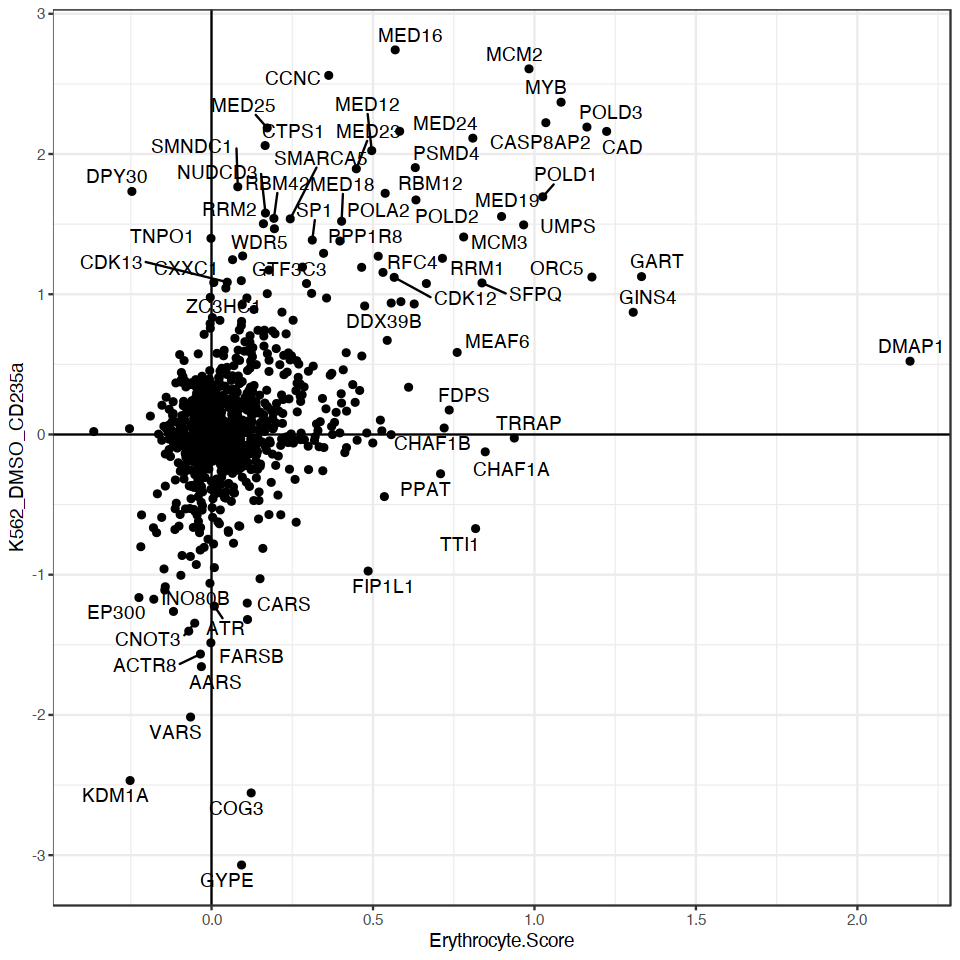

In [145]:
## Correlation between perturb seq ery score and bd246 screen for k562
shared = intersect(k562$gene, k562_bd246$X)
a = subset(k562, gene %in% shared)
rownames(a) = make.names(a$gene, unique=T)
b = subset(k562_bd246, X %in% shared)
rownames(b) = b$X
ab = cbind(a, b[rownames(a),])
ggplot(ab, aes(x=Erythrocyte.Score, y=K562_DMSO_CD235a, label=gene)) + geom_point() +
    geom_text_repel(max.overlaps=20) + theme_bw() + geom_vline(xintercept=0) + geom_hline(yintercept=0)

[1] "9030624J02Rik" "A230046K03Rik" "Aars"          "Aars2"        
  [5] "Abcb7"         "Acad9"         "Actl6a"        "Actr3"        
  [9] "Actr5"         "Actr6"         "Actr8"         "Adat2"        
 [13] "Adat3"         "Adck4"         "Ahctf1"        "Ak2"          
 [17] "Akirin2"       "Alg12"         "Alg14"         "Alg3"         
 [21] "Alg5"          "Alg8"          "Alg9"          "Alkbh8"       
 [25] "Ambra1"        "Arglu1"        "Atad3a"        "Atf6"         
 [29] "Atg9a"         "Atp5a1"        "Atp5b"         "Atp5c1"       
 [33] "Atp5f1"        "Atp5h"         "Atp5j"         "Atp5j2"       
 [37] "Atp5k"         "Atp5l"         "Atp6ap1"       "Atp6v0b"      
 [41] "Atpaf2"        "Atrip"         "Atxn1l"        "Aurkaip1"     
 [45] "Bod1l"         "Brd8"          "Brf1"          "Brms1"        
 [49] "Brwd3"         "Btf3"          "Bub1b"         "C1qbp"        
 [53] "Cars2"         "Cbfb"          "Ccdc22"        "Ccnf"         
 [57] "Ccnh"          "Ccs"           "Cct3"          "Cct5"         
 [61] "Cct7"          "Cdan1"         "Cdc45"         "Cdc6"         
 [65] "Cdca3"         "Cdk5rap3"      "Cdk7"          "Cebpa"        
 [69] "Cebpb"         "Cebpe"         "Cers2"         "Chchd4"       
 [73] "Chmp2a"        "Chmp3"         "Chtop"         "Clasrp"       
 [77] "Cml1"          "Cmtr1"         "Cnot10"        "Cnot11"       
 [81] "Coa3"          "Coa4"          "Commd10"       "Commd4"       
 [85] "Commd5"        "Commd6"        "Commd7"        "Commd8"       
 [89] "Cops6"         "Coq3"          "Coq4"          "Coq5"         
 [93] "Coq7"          "Cox10"         "Cox15"         "Cox16"        
 [97] "Cox18"         "Cox5a"         "Cox6c"         "Cox7b"        
[101] "Cpeb4"         "Cpox"          "Cpsf3l"        "Crcp"         
[105] "Creld2"        "Crls1"         "Csf3r"         "Csnk2a2"      
[109] "Csnk2b"        "Cstf3"         "Ctcf"          "Ctdp1"        
[113] "Ctu1"          "Cul4b"         "Cyc1"          "D10Wsu102e"   
[117] "Dad1"          "Dars"          "Dars2"         "Dcp1a"        
[121] "Dcp2"          "Dctd"          "Dda1"          "Ddb1"         
[125] "Ddost"         "Ddrgk1"        "Ddx20"         "Ddx59"        
[129] "Derl2"         "Dhps"          "Dhx8"          "Dld"          
[133] "Dmtn"          "Dnaja3"        "Dnajb9"        "Dnajc13"      
[137] "Dnajc24"       "Dnajc3"        "Dnlz"          "Dnm1l"        
[141] "Dnttip1"       "Dolpp1"        "Dpagt1"        "Dph3"         
[145] "Dph6"          "Dpm1"          "Dpm2"          "Dpm3"         
[149] "Dpy30"         "Dr1"           "Dsn1"          "E430025E21Rik"
[153] "E4f1"          "Ears2"         "Ecsit"         "Edc4"         
[157] "Edf1"          "Eef1e1"        "Eef1g"         "Eefsec"       
[161] "Efr3a"         "Ei24"          "Eif1"          "Eif2b1"       
[165] "Eif2b5"        "Eif2s1"        "Eif2s2"        "Eif3f"        
[169] "Eif3i"         "Eif4a3"        "Elac2"         "Elp3"         
[173] "Elp4"          "Emc1"          "Emc2"          "Emc3"         
[177] "Eme1"          "Eny2"          "Epc2"          "Eprs"         
[181] "Eral1"         "Ercc2"         "Erp44"         "Espl1"        
[185] "Etf1"          "Exoc1"         "Exosc2"        "Exosc3"       
[189] "Faf2"          "Fam32a"        "Fam98a"        "Fam98b"       
[193] "Fars2"         "Farsb"         "Fasn"          "Fh1"          
[197] "Fig4"          "Flcn"          "Fli1"          "Foxk1"        
[201] "Ftsj2"         "G2e3"          "Gadd45gip1"    "Galnt1"       
[205] "Ganab"         "Gars"          "Gatc"          "Gcn1l1"       
[209] "Gemin7"        "Gemin8"        "Gfer"          "Gfm1"         
[213] "Gigyf2"        "Glmn"          "Gm561"         "Gmppb"        
[217] "Gnb1l"         "Gnb2l1"        "Gnpnat1"       "Gpn2"         
[221] "Gpn3"          "Gpt2"          "Grpel1"        "Gss"          
[225] "Gtf2b"         "Gtf2e1"        "Gtf2h1"        "Gtf2h3"       
[229] "Gtf3c

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2015... Done.
  Querying GO_Cellular_Component_2015... Done.
  Querying GO_Biological_Process_2015... Done.
Parsing results... Done.


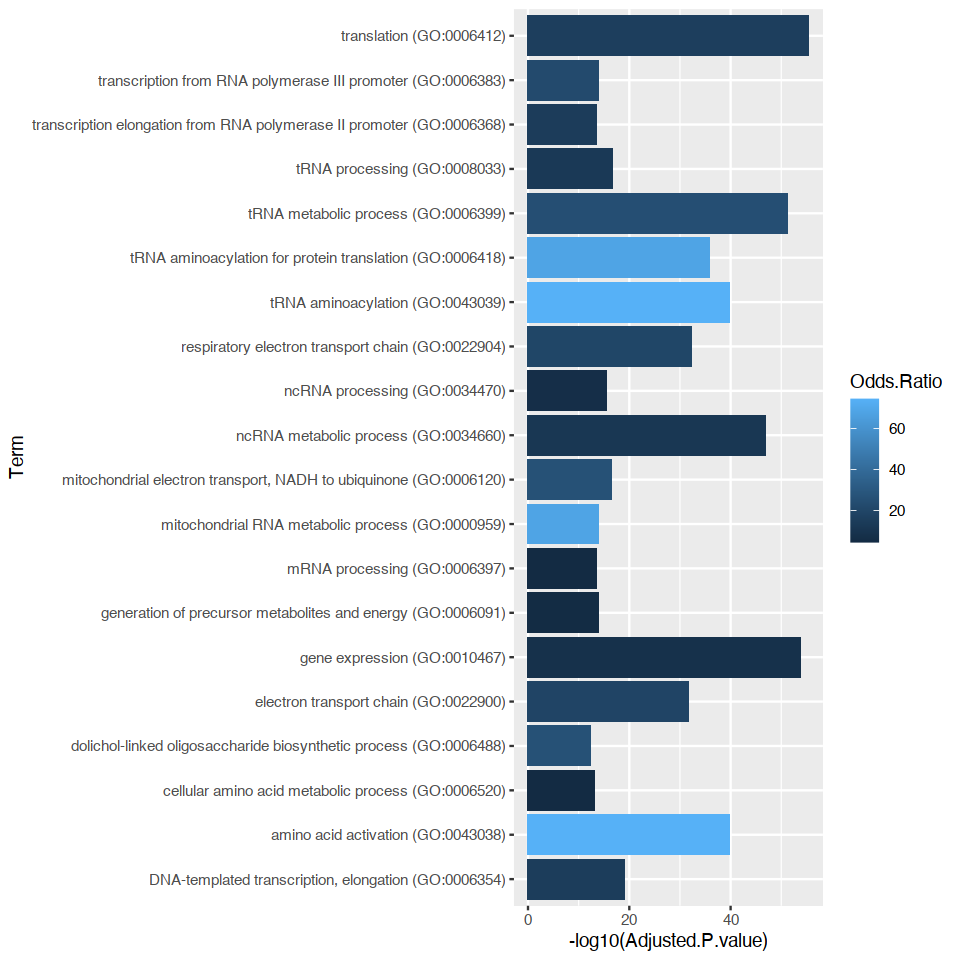

In [131]:
e2wd_hits = with(data_reps_summ, E2wd_CD11b + E2wd_GFP)
names(e2wd_hits) = row.names(data_reps_summ)
z = names(e2wd_hits[e2wd_hits < -2])
z[!is.na(z)]

websiteLive <- TRUE
dbs <- c("GO_Molecular_Function_2015", "GO_Cellular_Component_2015", "GO_Biological_Process_2015")
if (websiteLive) {
    enriched <- enrichr(z[!is.na(z)], dbs)
}
z = enriched[[3]]
z = z[order(z$Adjusted.P.value),]
ggplot(data=z[1:20,], aes(x=Term, y=-log10(Adjusted.P.value), fill=Odds.Ratio)) + geom_col() + coord_flip()

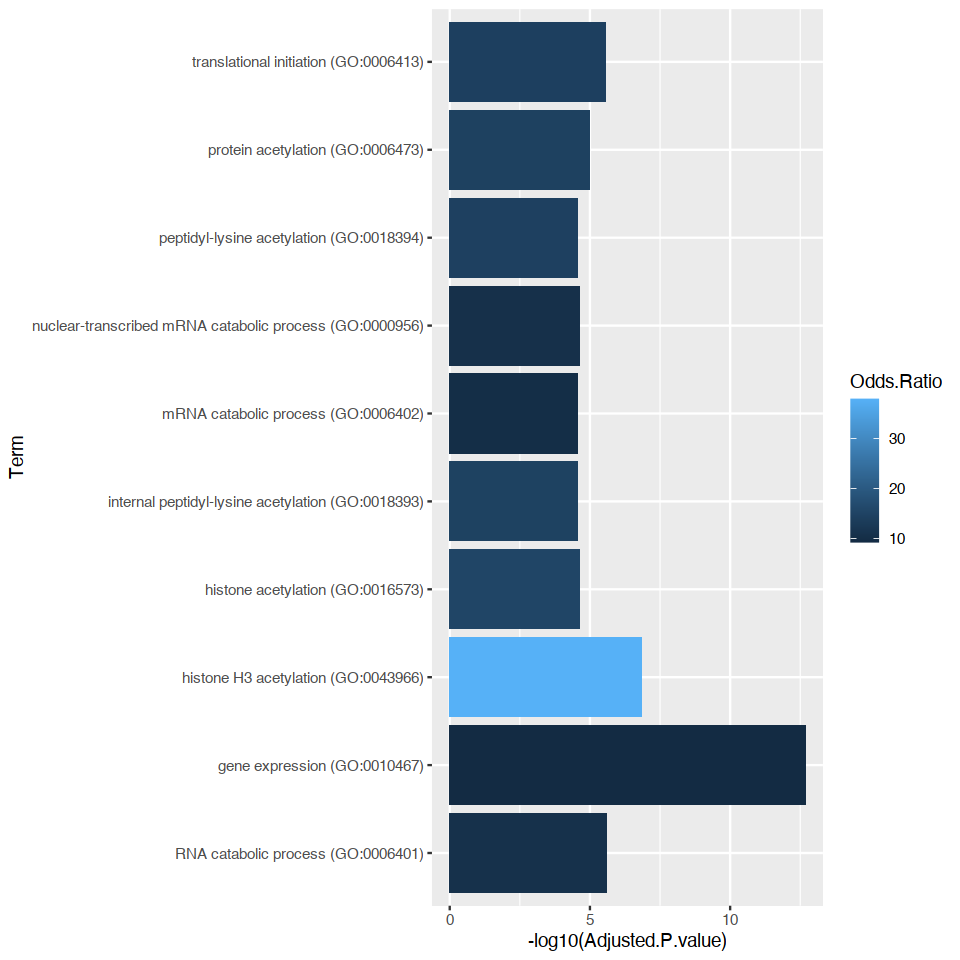

In [116]:
ggplot(data=enriched[[3]][1:10,], aes(x=Term, y=-log10(Adjusted.P.value), fill=Odds.Ratio)) + geom_col() + coord_flip()

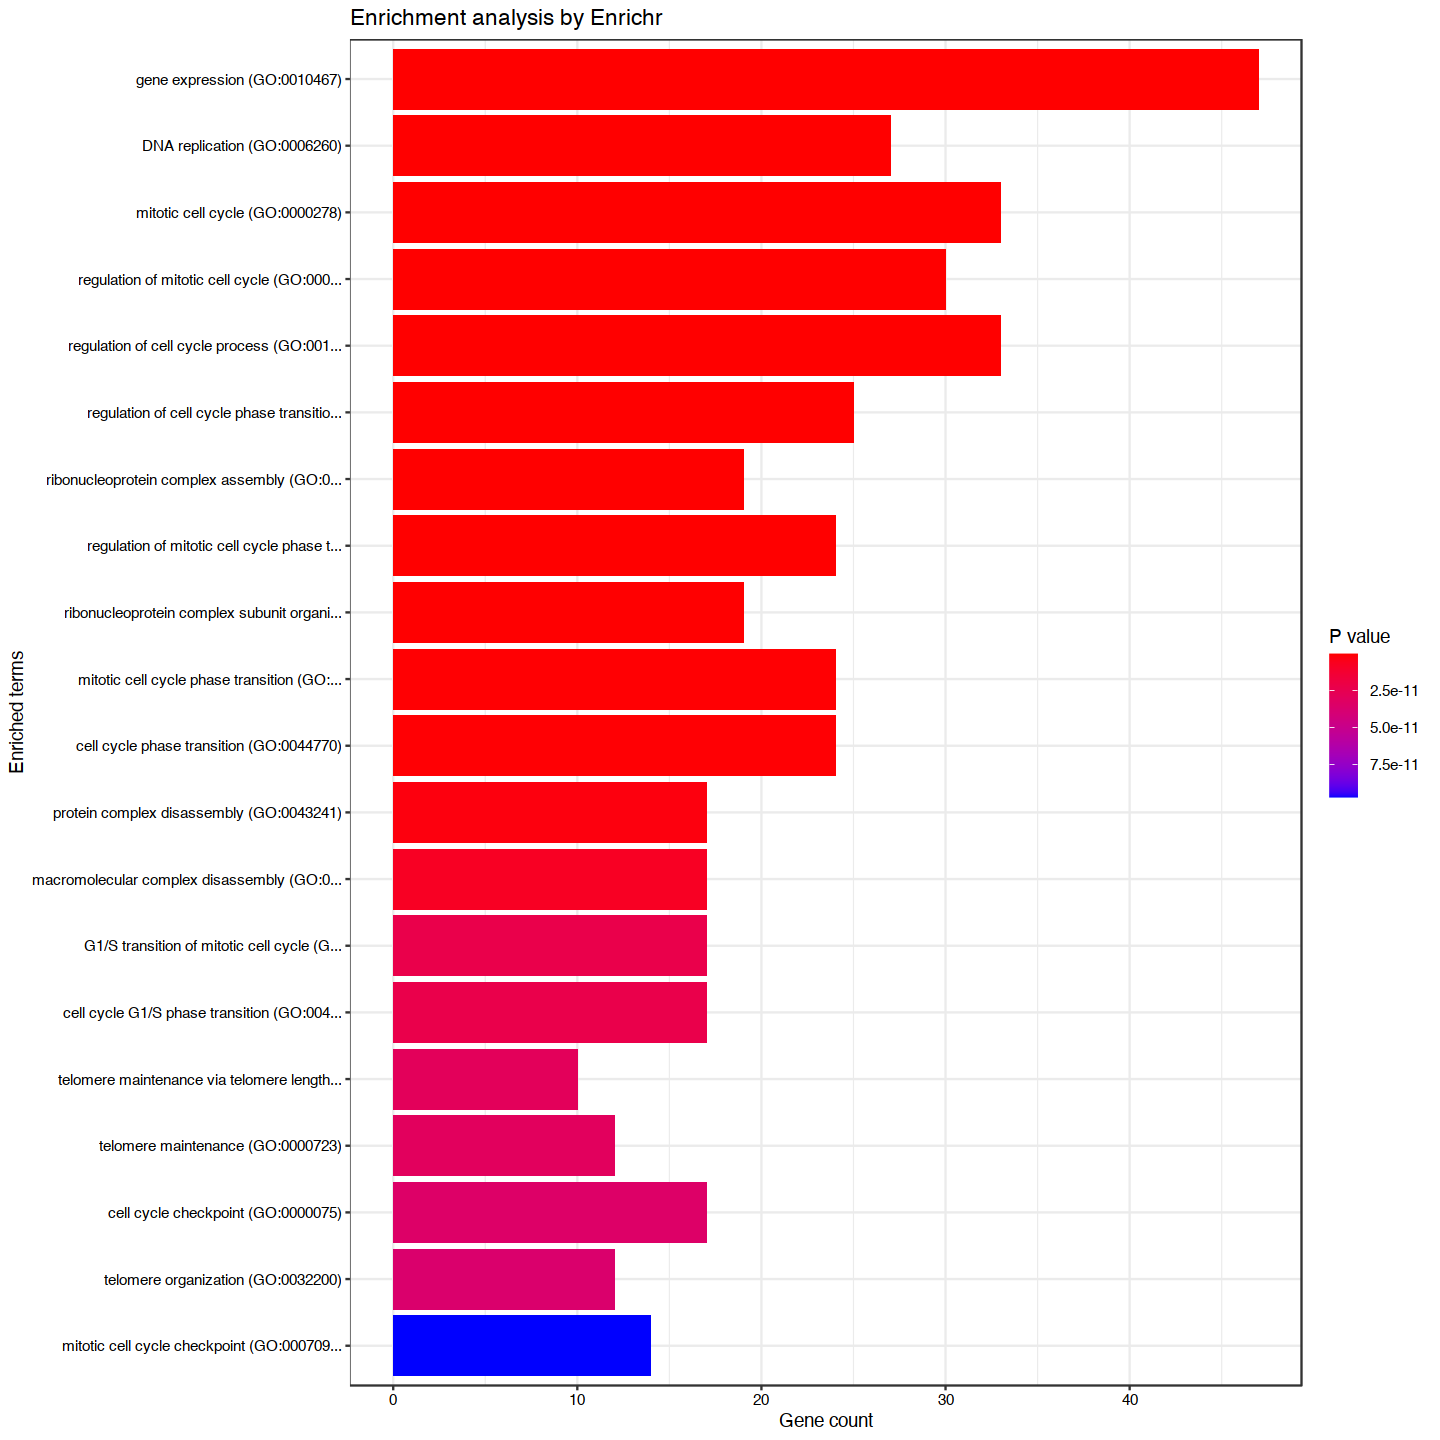

In [99]:
plotEnrich(enriched[[3]], showTerms = 20, numChar = 40, y = "Odds.Ratio", orderBy = "P.value")

Warning message:
“Removed 43 rows containing missing values (geom_point).”
Warning message:
“Removed 11 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 103 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


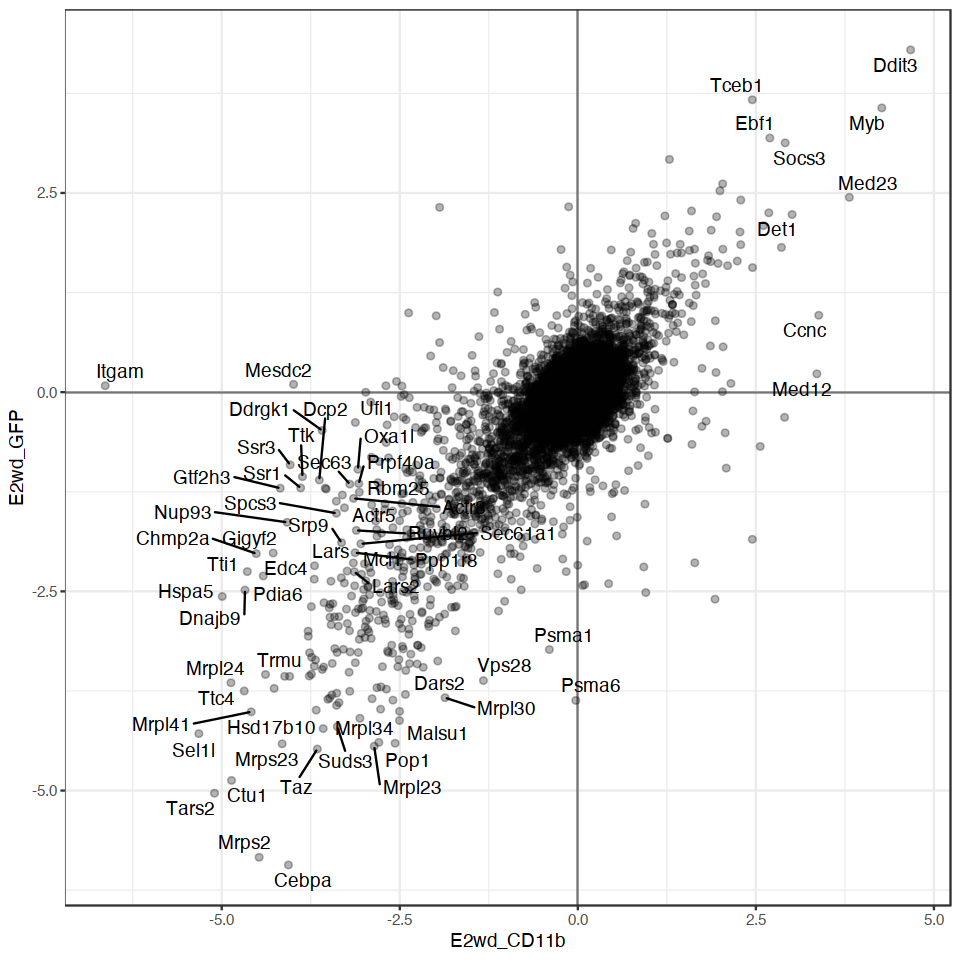

In [73]:
options(repr.plot.width=8, repr.plot.height=8)

to_label = subset(data_reps_summ, E2wd_CD11b > 3 | E2wd_GFP > 3 | E2wd_CD11b < -3 | E2wd_GFP < -3)
to_label$gene = row.names(to_label)
ggplot(data_reps_summ, aes(x=E2wd_CD11b, y=E2wd_GFP)) + geom_point(alpha=0.3) +
theme_bw() + geom_hline(yintercept=0, alpha=0.5) +
    geom_vline(xintercept=0, alpha=0.5) +
    geom_text_repel(data=to_label, aes(x=E2wd_CD11b, y=E2wd_GFP, label=gene), max.overlaps=20)

In [10]:
library(enrichR)
setEnrichrSite("Enrichr") # Human genes

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



In [ ]:
dbs <- c("GO_Molecular_Function_2015", "GO_Cellular_Component_2015", "GO_Biological_Process_2015")
if (websiteLive) {
    enriched <- enrichr(c("Runx1", "Gfi1", "Gfi1b", "Spi1", "Gata1", "Kdr"), dbs)
}

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“ggrepel: 1525 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


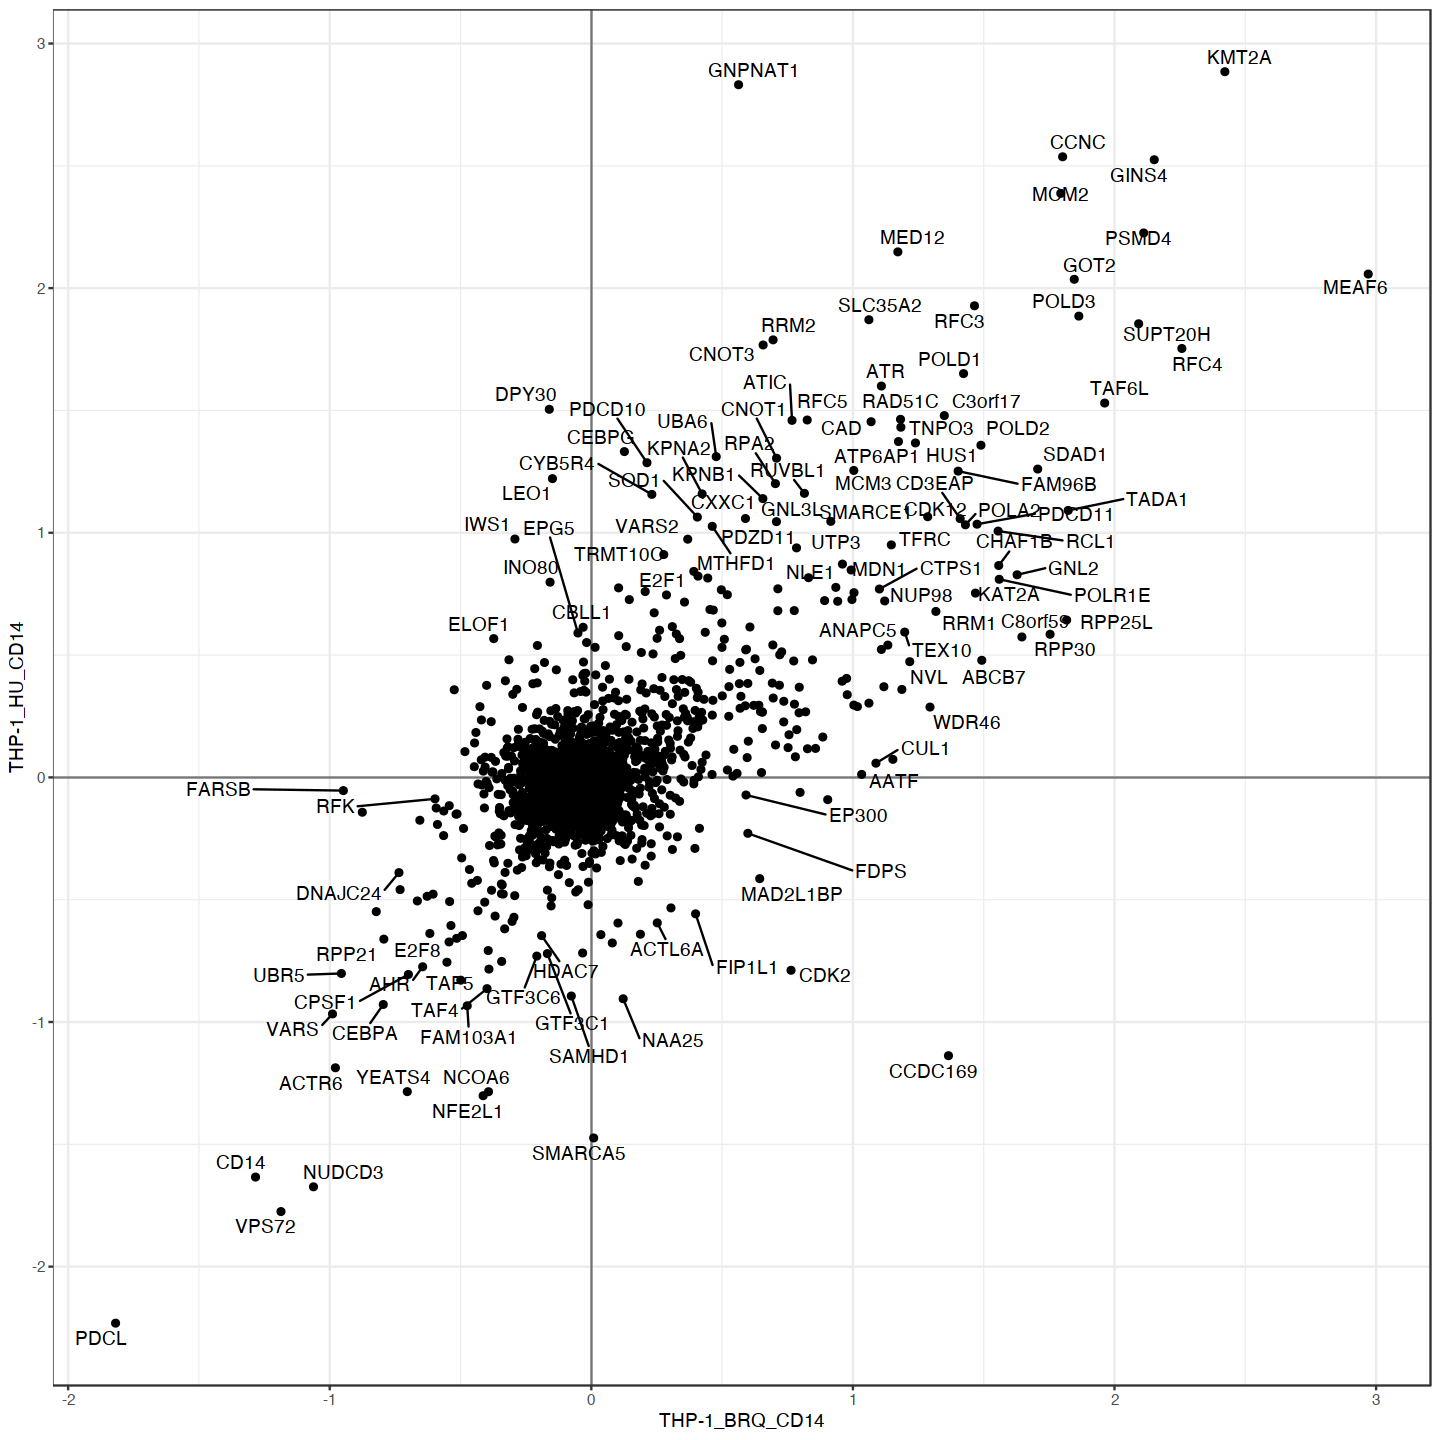

In [46]:
plot_dfs("THP-1_BRQ_CD14", "THP-1_HU_CD14")

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“ggrepel: 1551 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


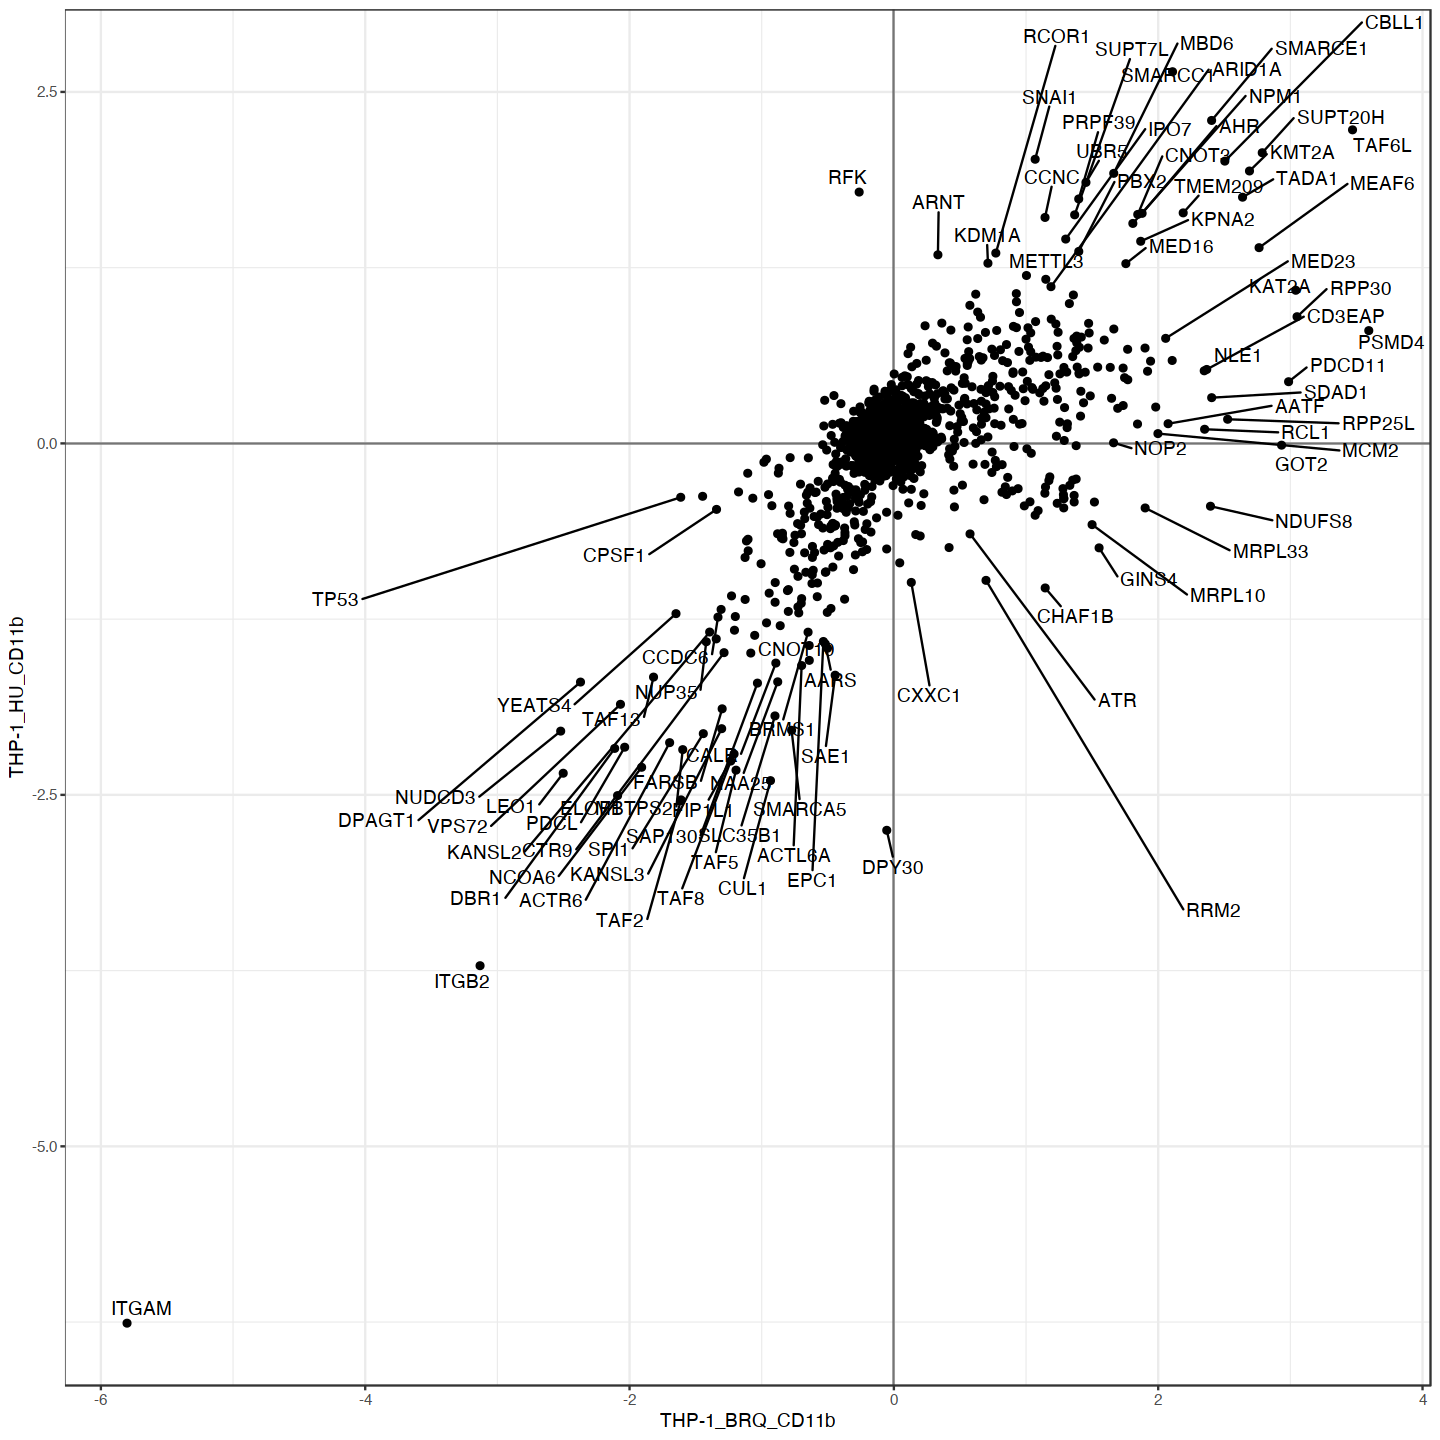

In [47]:
plot_dfs("THP-1_BRQ_CD11b", "THP-1_HU_CD11b")

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“ggrepel: 1517 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


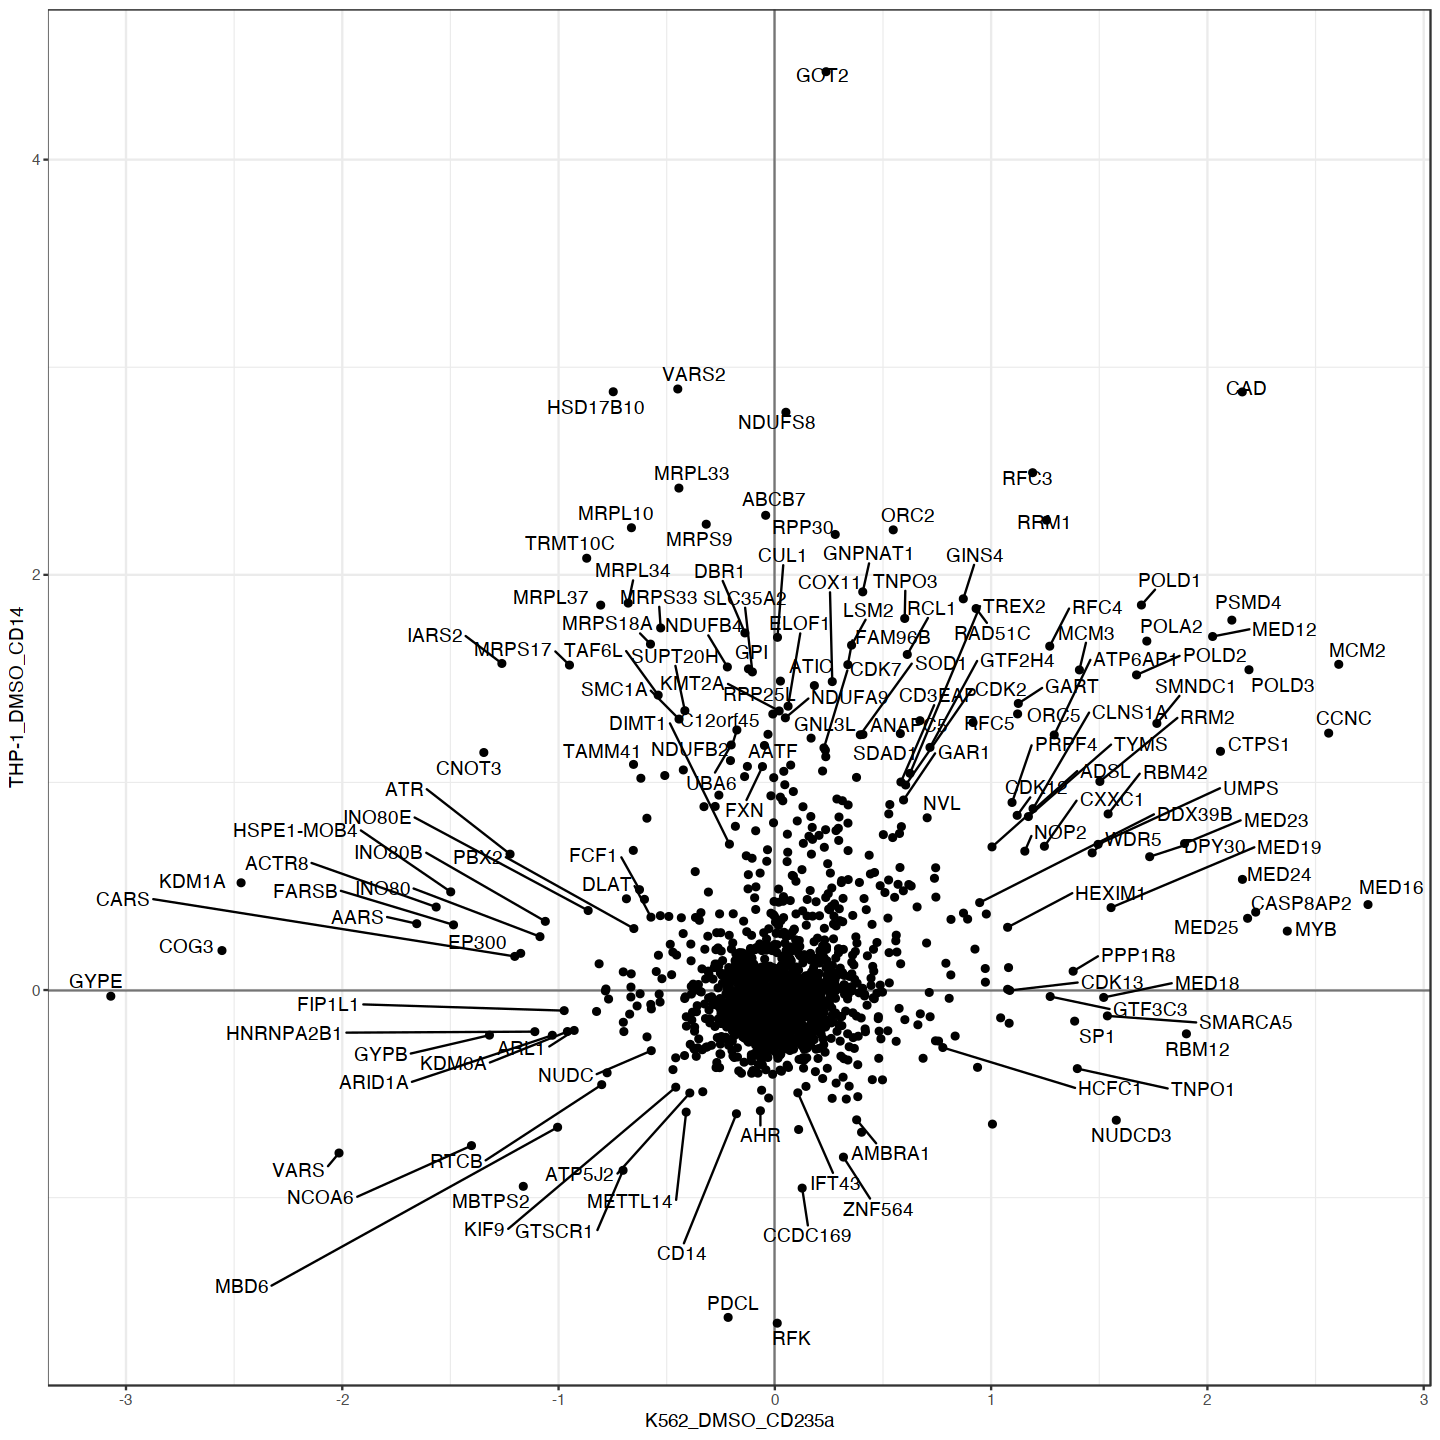

In [49]:
plot_dfs("K562_DMSO_CD235a", "THP-1_DMSO_CD14")

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“ggrepel: 1502 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


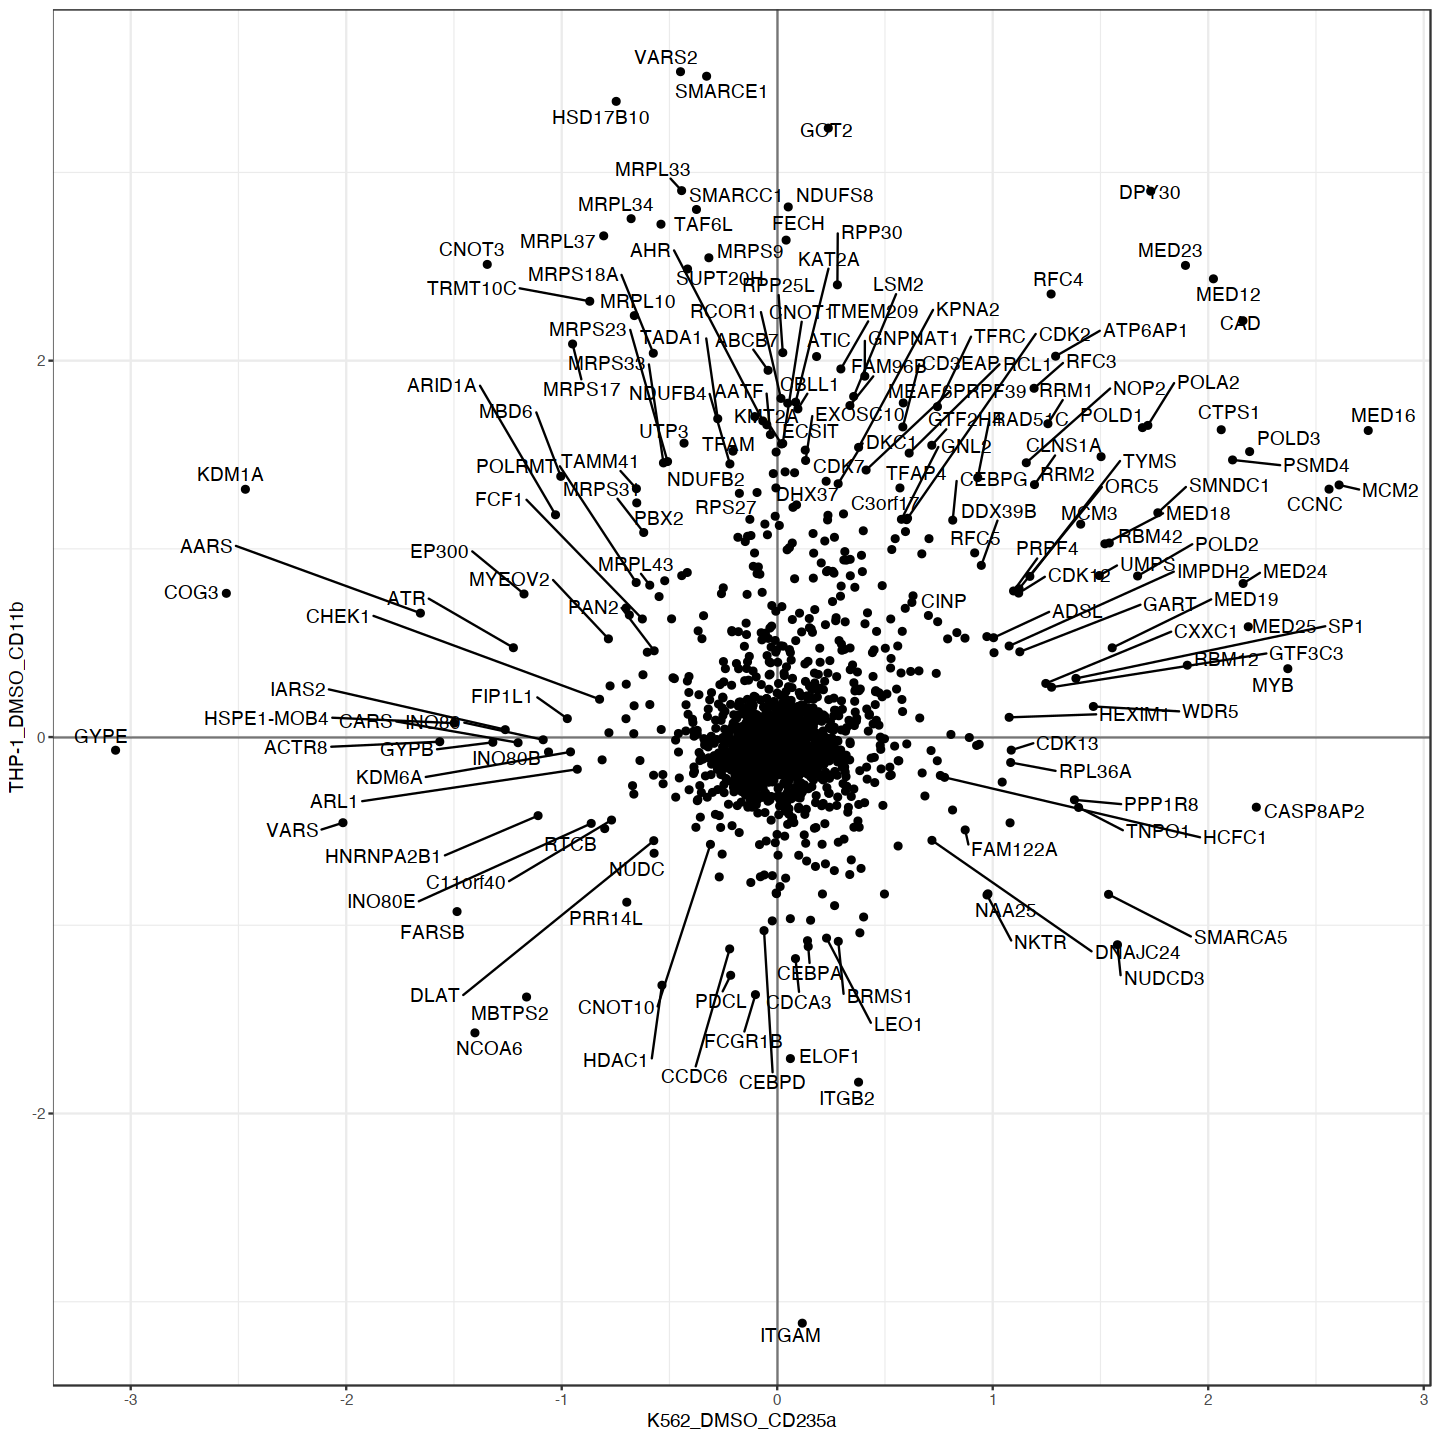

In [50]:
plot_dfs("K562_DMSO_CD235a", "THP-1_DMSO_CD11b")

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“ggrepel: 1513 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


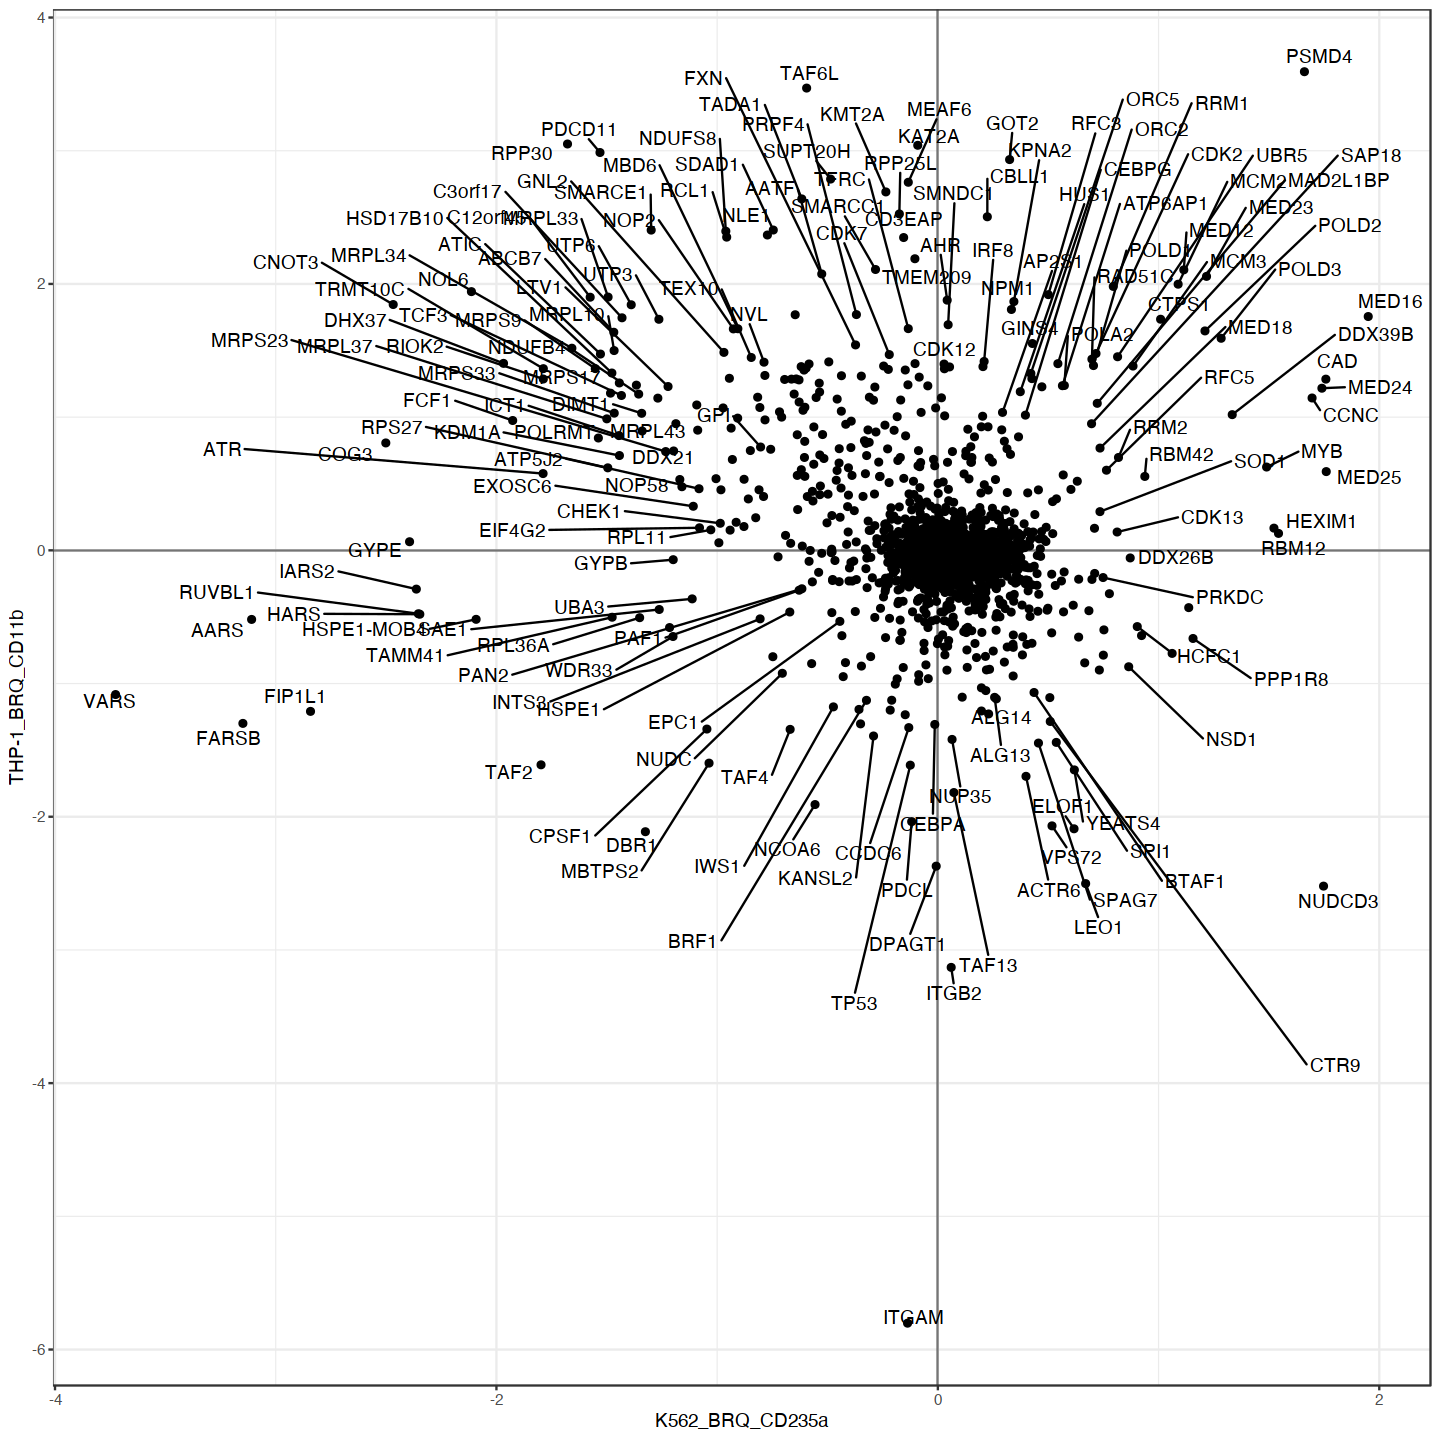

In [51]:
plot_dfs("K562_BRQ_CD235a", "THP-1_BRQ_CD11b")

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“ggrepel: 1518 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


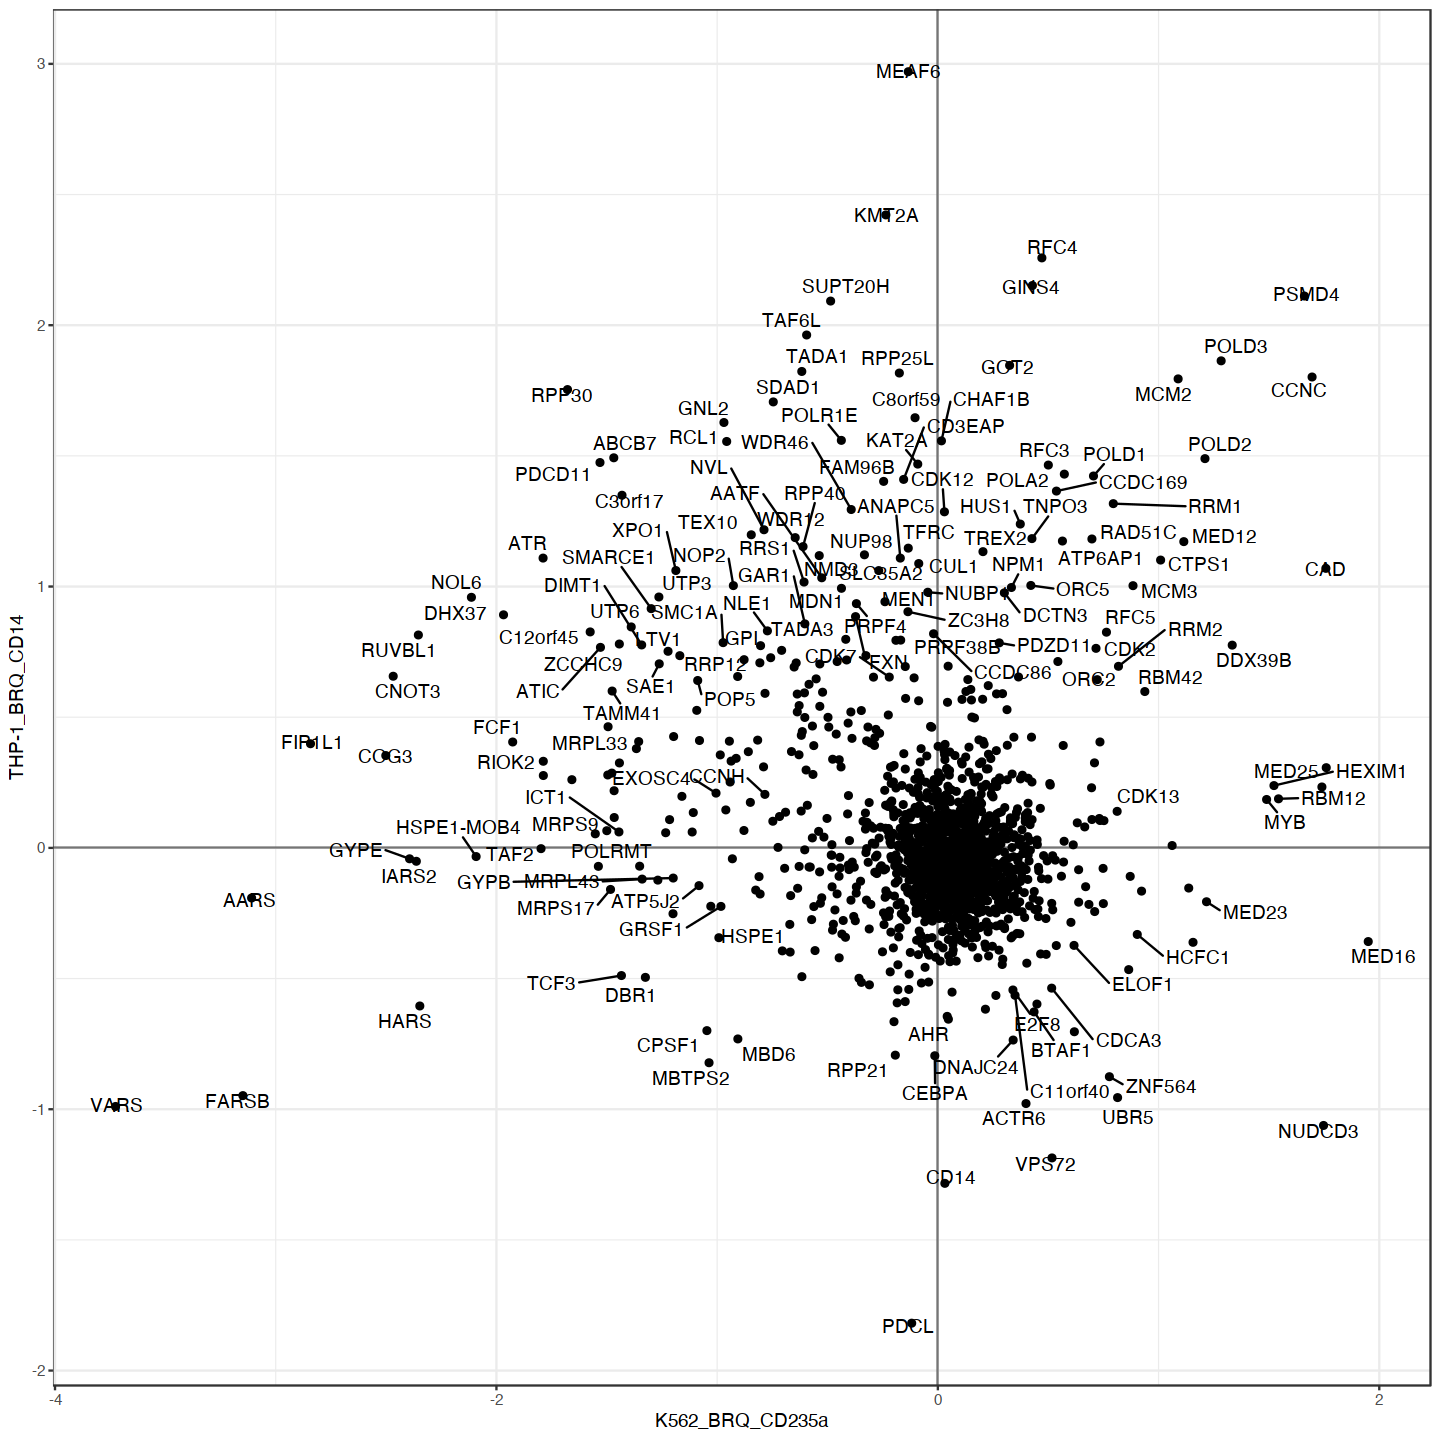

In [52]:
plot_dfs("K562_BRQ_CD235a", "THP-1_BRQ_CD14")

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“ggrepel: 1535 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


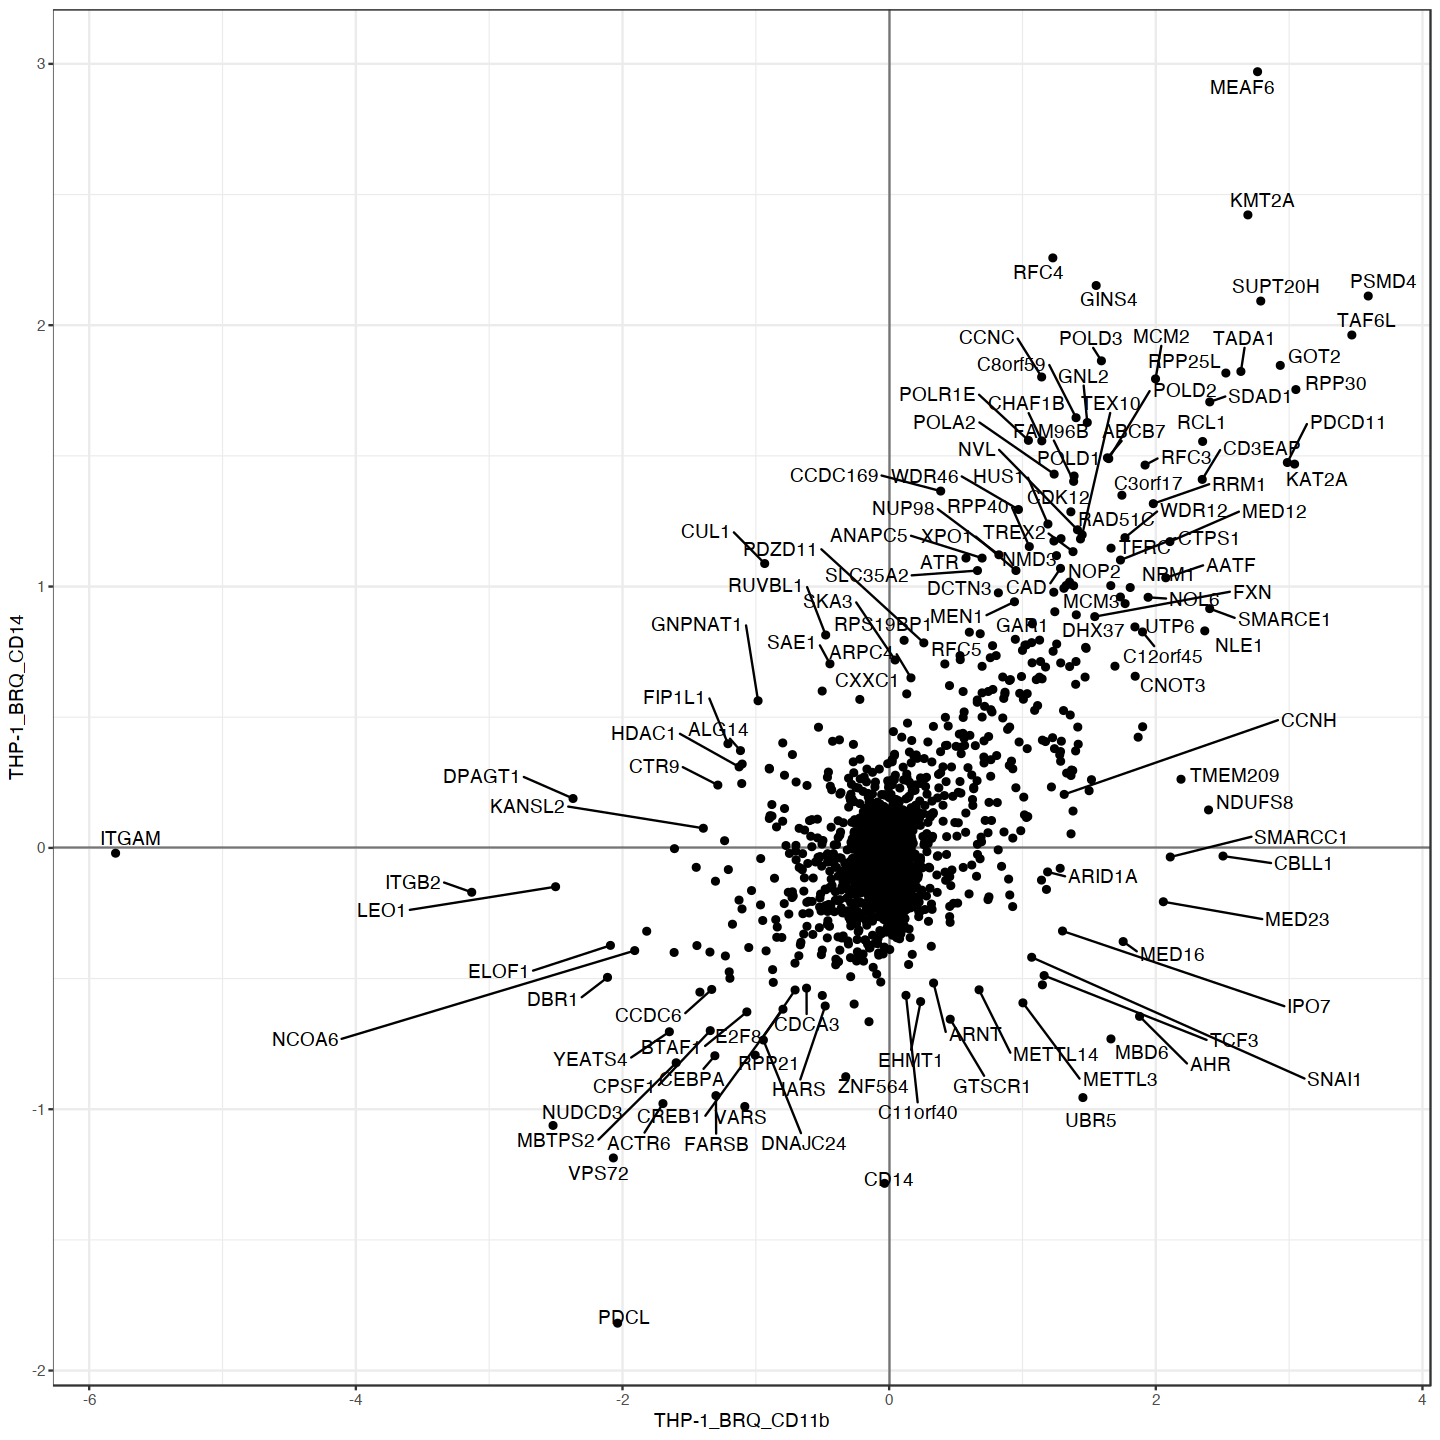

In [55]:
plot_dfs("THP-1_BRQ_CD11b", "THP-1_BRQ_CD14")

In [ ]:
# interesting: HU CD11b looks like K562 -- ATR, CHEK1 
# FIP1L1, DBR1 
# a lot of complexes like ACTR6 are positive in K562 
# HEXIM
# the only things in common for THP1 and K562 are replication 
# MED16 is more for CD11b/CD235a than CD61/CD14 
# PSMD4 up for everything lol 

In [123]:
subset(data_summ, gene=="MBD6")

Cell.line Drug Antibody gene l2fc_med   cond            
1  K562      BRQ  CD235a   MBD6 -0.9061301 K562_BRQ_CD235a 
2  K562      DMSO CD235a   MBD6 -1.0044117 K562_DMSO_CD235a
3  K562      DMSO CD61     MBD6 -0.2013862 K562_DMSO_CD61  
4  K562      HU   CD235a   MBD6 -0.9284266 K562_HU_CD235a  
5  K562      PMA  CD235a   MBD6  0.8477870 K562_PMA_CD235a 
6  THP-1     BRQ  CD11b    MBD6  1.6635679 THP-1_BRQ_CD11b 
7  THP-1     BRQ  CD14     MBD6 -0.7310166 THP-1_BRQ_CD14  
8  THP-1     DMSO CD11b    MBD6  1.3851315 THP-1_DMSO_CD11b
9  THP-1     DMSO CD14     MBD6 -0.6609253 THP-1_DMSO_CD14 
10 THP-1     HU   CD11b    MBD6  1.9210199 THP-1_HU_CD11b  
11 THP-1     HU   CD14     MBD6 -0.4587676 THP-1_HU_CD14   
12 THP-1     PMA  CD14     MBD6 -1.1755888 THP-1_PMA_CD14

## Enrichment/depletion of guides in overall pool

In [18]:
data = read.csv("bd246_sgID_read_counts.csv")
data = subset(data, Fraction == "All")
head(data)

X     Cell.line Tx   Fraction Antibody gene sgID                   
33495 33494 K562      DMSO All      CD235a   AAAS AAAS_-_53715438.23-P1P2
33496 33495 K562      DMSO All      CD235a   AAAS AAAS_-_53715363.23-P1P2
33497 33496 K562      DMSO All      CD235a   AAAS AAAS_+_53715355.23-P1P2
33498 33497 K562      DMSO All      CD235a   AAAS AAAS_+_53715016.23-P1P2
33499 33498 K562      DMSO All      CD235a   AAAS AAAS_-_53715347.23-P1P2
33500 33499 K562      DMSO All      CD235a   AAAS AAAS_-_53715371.23-P1P2
      counts
33495 4876  
33496  799  
33497  651  
33498  634  
33499  538  
33500  524

In [19]:
data$cond = with(data, paste(Cell.line, Tx, Antibody, sep='_'))
head(data)

X     Cell.line Tx   Fraction Antibody gene sgID                   
33495 33494 K562      DMSO All      CD235a   AAAS AAAS_-_53715438.23-P1P2
33496 33495 K562      DMSO All      CD235a   AAAS AAAS_-_53715363.23-P1P2
33497 33496 K562      DMSO All      CD235a   AAAS AAAS_+_53715355.23-P1P2
33498 33497 K562      DMSO All      CD235a   AAAS AAAS_+_53715016.23-P1P2
33499 33498 K562      DMSO All      CD235a   AAAS AAAS_-_53715347.23-P1P2
33500 33499 K562      DMSO All      CD235a   AAAS AAAS_-_53715371.23-P1P2
      counts cond            
33495 4876   K562_DMSO_CD235a
33496  799   K562_DMSO_CD235a
33497  651   K562_DMSO_CD235a
33498  634   K562_DMSO_CD235a
33499  538   K562_DMSO_CD235a
33500  524   K562_DMSO_CD235a

In [20]:
data_heatmap = dcast(data[,c("sgID", "counts", "cond")], sgID ~ cond, value.var = "counts")
rownames(data_heatmap) = data_heatmap$sgID
data_heatmap = data_heatmap[,2:dim(data_heatmap)[2]]
head(data_heatmap)

K562_DMSO_CD235a K562_DMSO_CD61 K562_HU_CD235a
AAAS_+_53714942.23-P1P2 349              276            372           
AAAS_+_53714983.23-P1P2 403              424            289           
AAAS_+_53715016.23-P1P2 634              433            451           
AAAS_+_53715355.23-P1P2 651              680            573           
AAAS_-_53715347.23-P1P2 538              302            328           
AAAS_-_53715352.23-P1P2 340              503            378           
                        THP-1_BRQ_CD11b THP-1_DMSO_CD11b THP-1_DMSO_CD14
AAAS_+_53714942.23-P1P2 404             259              461            
AAAS_+_53714983.23-P1P2 293             258              299            
AAAS_+_53715016.23-P1P2 458             354              483            
AAAS_+_53715355.23-P1P2 754             545              406            
AAAS_-_53715347.23-P1P2 572             253              529            
AAAS_-_53715352.23-P1P2 438             234              582            
                        THP-1_HU_CD11b THP-1_HU_CD14
AAAS_+_53714942.23-P1P2 177            258          
AAAS_+_53714983.23-P1P2 178            187          
AAAS_+_53715016.23-P1P2 301            329          
AAAS_+_53715355.23-P1P2 364            397          
AAAS_-_53715347.23-P1P2 257            325          
AAAS_-_53715352.23-P1P2 214            244

In [21]:
# normalize to library size

data_heatmap_norm = sweep(data_heatmap, 2, apply(data_heatmap, 2, function(x) sum(x, na.rm=T)), `/`)
head(data_heatmap_norm)

K562_DMSO_CD235a K562_DMSO_CD61 K562_HU_CD235a
AAAS_+_53714942.23-P1P2 4.805442e-05     4.247819e-05   5.520991e-05  
AAAS_+_53714983.23-P1P2 5.548977e-05     6.525635e-05   4.289157e-05  
AAAS_+_53715016.23-P1P2 8.729656e-05     6.664151e-05   6.693459e-05  
AAAS_+_53715355.23-P1P2 8.963732e-05     1.046564e-04   8.504107e-05  
AAAS_-_53715347.23-P1P2 7.407815e-05     4.647976e-05   4.867970e-05  
AAAS_-_53715352.23-P1P2 4.681519e-05     7.741496e-05   5.610039e-05  
                        THP-1_BRQ_CD11b THP-1_DMSO_CD11b THP-1_DMSO_CD14
AAAS_+_53714942.23-P1P2 5.273563e-05    6.035785e-05     7.889787e-05   
AAAS_+_53714983.23-P1P2 3.824638e-05    6.012481e-05     5.117237e-05   
AAAS_+_53715016.23-P1P2 5.978445e-05    8.249683e-05     8.266306e-05   
AAAS_+_53715355.23-P1P2 9.842243e-05    1.270078e-04     6.948489e-05   
AAAS_-_53715347.23-P1P2 7.466530e-05    5.895960e-05     9.053573e-05   
AAAS_-_53715352.23-P1P2 5.717377e-05    5.453180e-05     9.960642e-05   
                        THP-1_HU_CD11b THP-1_HU_CD14
AAAS_+_53714942.23-P1P2 4.319399e-05   5.859472e-05 
AAAS_+_53714983.23-P1P2 4.343803e-05   4.246982e-05 
AAAS_+_53715016.23-P1P2 7.345419e-05   7.471963e-05 
AAAS_+_53715355.23-P1P2 8.882833e-05   9.016320e-05 
AAAS_-_53715347.23-P1P2 6.271670e-05   7.381118e-05 
AAAS_-_53715352.23-P1P2 5.222325e-05   5.541516e-05

In [22]:
# normalize to the average of two DMSOs 

data_heatmap_norm[,1:3] = log2(data_heatmap_norm[,1:3]/apply(data_heatmap_norm[,1:2], 1, mean))
data_heatmap_norm[,4:8] = log2(data_heatmap_norm[,4:8]/apply(data_heatmap_norm[,5:6], 1, mean))
head(data_heatmap_norm)

K562_DMSO_CD235a K562_DMSO_CD61 K562_HU_CD235a
AAAS_+_53714942.23-P1P2  0.08623153      -0.09171519     0.2864897    
AAAS_+_53714983.23-P1P2 -0.12168311       0.11221337    -0.4932108    
AAAS_+_53715016.23-P1P2  0.18164667      -0.20785710    -0.2015261    
AAAS_+_53715355.23-P1P2 -0.11606792       0.10742133    -0.1920077    
AAAS_-_53715347.23-P1P2  0.29739371      -0.37505186    -0.3083340    
AAAS_-_53715352.23-P1P2 -0.40796675       0.31766895    -0.1469327    
                        THP-1_BRQ_CD11b THP-1_DMSO_CD11b THP-1_DMSO_CD14
AAAS_+_53714942.23-P1P2 -0.400886677    -0.206123238      0.1803216     
AAAS_+_53714983.23-P1P2 -0.541021752     0.111615283     -0.1209801     
AAAS_+_53715016.23-P1P2 -0.466021157    -0.001452761      0.0014513     
AAAS_+_53715355.23-P1P2  0.002583246     0.370441587     -0.4997047     
AAAS_-_53715347.23-P1P2 -0.001590673    -0.342301801      0.2764588     
AAAS_-_53715352.23-P1P2 -0.430799183    -0.499054889      0.3700860     
                        THP-1_HU_CD11b THP-1_HU_CD14
AAAS_+_53714942.23-P1P2 -0.6888340     -0.24889395  
AAAS_+_53714983.23-P1P2 -0.3573865     -0.38990719  
AAAS_+_53715016.23-P1P2 -0.1689466     -0.14430421  
AAAS_+_53715355.23-P1P2 -0.1453842     -0.12386531  
AAAS_-_53715347.23-P1P2 -0.2531788     -0.01818914  
AAAS_-_53715352.23-P1P2 -0.5614606     -0.47587195

In [23]:
data_heatmap_melt = melt(as.matrix(data_heatmap_norm))
data_heatmap_melt$Var1 = as.character(data_heatmap_melt$Var1)
head(data_heatmap_melt)

Var1                    Var2             value      
1 AAAS_+_53714942.23-P1P2 K562_DMSO_CD235a  0.08623153
2 AAAS_+_53714983.23-P1P2 K562_DMSO_CD235a -0.12168311
3 AAAS_+_53715016.23-P1P2 K562_DMSO_CD235a  0.18164667
4 AAAS_+_53715355.23-P1P2 K562_DMSO_CD235a -0.11606792
5 AAAS_-_53715347.23-P1P2 K562_DMSO_CD235a  0.29739371
6 AAAS_-_53715352.23-P1P2 K562_DMSO_CD235a -0.40796675

In [24]:
data_heatmap_melt$gene = as.character(sapply(data_heatmap_melt$Var1, function(x) strsplit(x, '_')[[1]][1]))
head(data_heatmap_melt)

Var1                    Var2             value       gene
1 AAAS_+_53714942.23-P1P2 K562_DMSO_CD235a  0.08623153 AAAS
2 AAAS_+_53714983.23-P1P2 K562_DMSO_CD235a -0.12168311 AAAS
3 AAAS_+_53715016.23-P1P2 K562_DMSO_CD235a  0.18164667 AAAS
4 AAAS_+_53715355.23-P1P2 K562_DMSO_CD235a -0.11606792 AAAS
5 AAAS_-_53715347.23-P1P2 K562_DMSO_CD235a  0.29739371 AAAS
6 AAAS_-_53715352.23-P1P2 K562_DMSO_CD235a -0.40796675 AAAS

In [25]:
data_summ = data_heatmap_melt %>% group_by(Var2, gene) %>% summarize(l2fc_med = median(value))
colnames(data_summ) = c("cond", "gene", "l2fc_med")
head(data_summ)

`summarise()` has grouped output by 'Var2'. You can override using the `.groups` argument.



cond             gene   l2fc_med   
1 K562_DMSO_CD235a AAAS    0.06750005
2 K562_DMSO_CD235a AARS    0.39450303
3 K562_DMSO_CD235a AATF    0.01521092
4 K562_DMSO_CD235a ABCB11 -0.02963039
5 K562_DMSO_CD235a ABCB7   0.32304649
6 K562_DMSO_CD235a ABL2   -0.02697220

In [26]:
data_summ_heatmap = dcast(data_summ[,c("gene", "l2fc_med", "cond")], gene ~ cond, value.var = "l2fc_med")
rownames(data_summ_heatmap) = data_summ_heatmap$gene
data_summ_heatmap = data_summ_heatmap[,2:dim(data_summ_heatmap)[2]]
head(data_summ_heatmap)

K562_DMSO_CD235a K562_DMSO_CD61 K562_HU_CD235a THP-1_BRQ_CD11b
AAAS    0.06750005      -0.07102195    -0.13887690    -0.26954783    
AARS    0.39450303      -0.54615548     0.82228082             NA    
AATF    0.01521092      -0.01578755     0.10840831     0.30492726    
ABCB11 -0.02963039       0.02660579     0.03325137    -0.09909216    
ABCB7   0.32304649      -0.41690632     1.31703035     1.13682396    
ABL2   -0.02697220       0.02642237     0.06903233    -0.04401652    
       THP-1_DMSO_CD11b THP-1_DMSO_CD14 THP-1_HU_CD11b THP-1_HU_CD14
AAAS   -0.08840437       0.08233529     -0.30528266    -0.10535325  
AARS            NA               NA              NA             NA  
AATF   -0.01884434       0.01824884     -0.06575651     0.02983923  
ABCB11  0.01172240      -0.01294668     -0.27212879    -0.06066312  
ABCB7  -0.05310339       0.05118701      0.37473644     0.73203833  
ABL2    0.07391045      -0.07797391      0.07688559    -0.05855112

In [27]:
write.csv(data_summ_heatmap, "220622_bd246_guide_enr.csv", quote=F)

In [28]:
metab_data = merge(data_summ_heatmap, metab_genes, by.x="row.names", by.y="Gene.Name..Hs.")
head(metab_data)
write.csv(metab_data, "220621_bd246_guide_enr_metab.csv", quote=F, row.names=F)

Row.names K562_DMSO_CD235a K562_DMSO_CD61 K562_HU_CD235a THP-1_BRQ_CD11b
1 ABCB11    -0.02963039       0.02660579     0.033251374   -0.09909216    
2 ACADS      0.03583404      -0.03676762     0.100573047   -0.27719536    
3 ACOT11    -0.05324002       0.05131685     0.011832813   -0.04525780    
4 ACSL4      0.01968960      -0.01996380     0.026556462   -0.08272356    
5 ACSS2     -0.01116806       0.01105267    -0.001862868    0.00580215    
6 ADH5      -0.23664957       0.20324624    -0.034202287    0.06080986    
  THP-1_DMSO_CD11b THP-1_DMSO_CD14 THP-1_HU_CD11b THP-1_HU_CD14 X   
1  0.01172240      -0.012946682    -0.27212879    -0.06066312   15  
2  0.04566229      -0.050777090    -0.20800087    -0.08548916   379 
3  0.02687247      -0.027383369     0.07147059    -0.05233185   173 
4  0.06164721      -0.064929167    -0.18343347    -0.33962251   399 
5 -0.01022248       0.009866496    -0.01753255     0.09407906   409 
6 -0.26619081       0.224642774     0.11569639     0.02074852   1603
  Functional.Category
1 ABC Transporter    
2 Fatty Acid         
3 CoA                
4 Fatty Acid         
5 Fatty Acid         
6 Multipurpose       
  Included.in.which.metabolic.enzyme.transporter.sets..please.add.your.name.if.you.are.adding.a.new.gene.
1 In RP                                                                                                  
2 In RP                                                                                                  
3 In RP                                                                                                  
4 In RP                                                                                                  
5 In RP                                                                                                  
6 In RP

In [87]:
plot_dfs = function(s1, s2) {
    g1 = subset(data_summ, cond == s1)
    rownames(g1) = g1$gene
    g2 = subset(data_summ, cond == s2)
    rownames(g2) = g2$gene
    genes = intersect(g1$gene, g2$gene)
    df = as.data.frame(cbind(g1[genes,]$l2fc_med, g2[genes,]$l2fc_med))
    colnames(df) = c(s1 ,s2)
    rownames(df) = genes
    
    options(repr.plot.width=12, repr.plot.height=12)
    ggplot(df, aes(x=get(s1), y=get(s2), label=!!genes)) + geom_point() +
    geom_text_repel() + theme_bw() + geom_hline(yintercept=0, alpha=0.5) +
    geom_vline(xintercept=0, alpha=0.5) + xlab(s1) + ylab(s2)
}

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Removed 105 rows containing missing values (geom_point).”
Warning message:
“Removed 105 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 1449 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


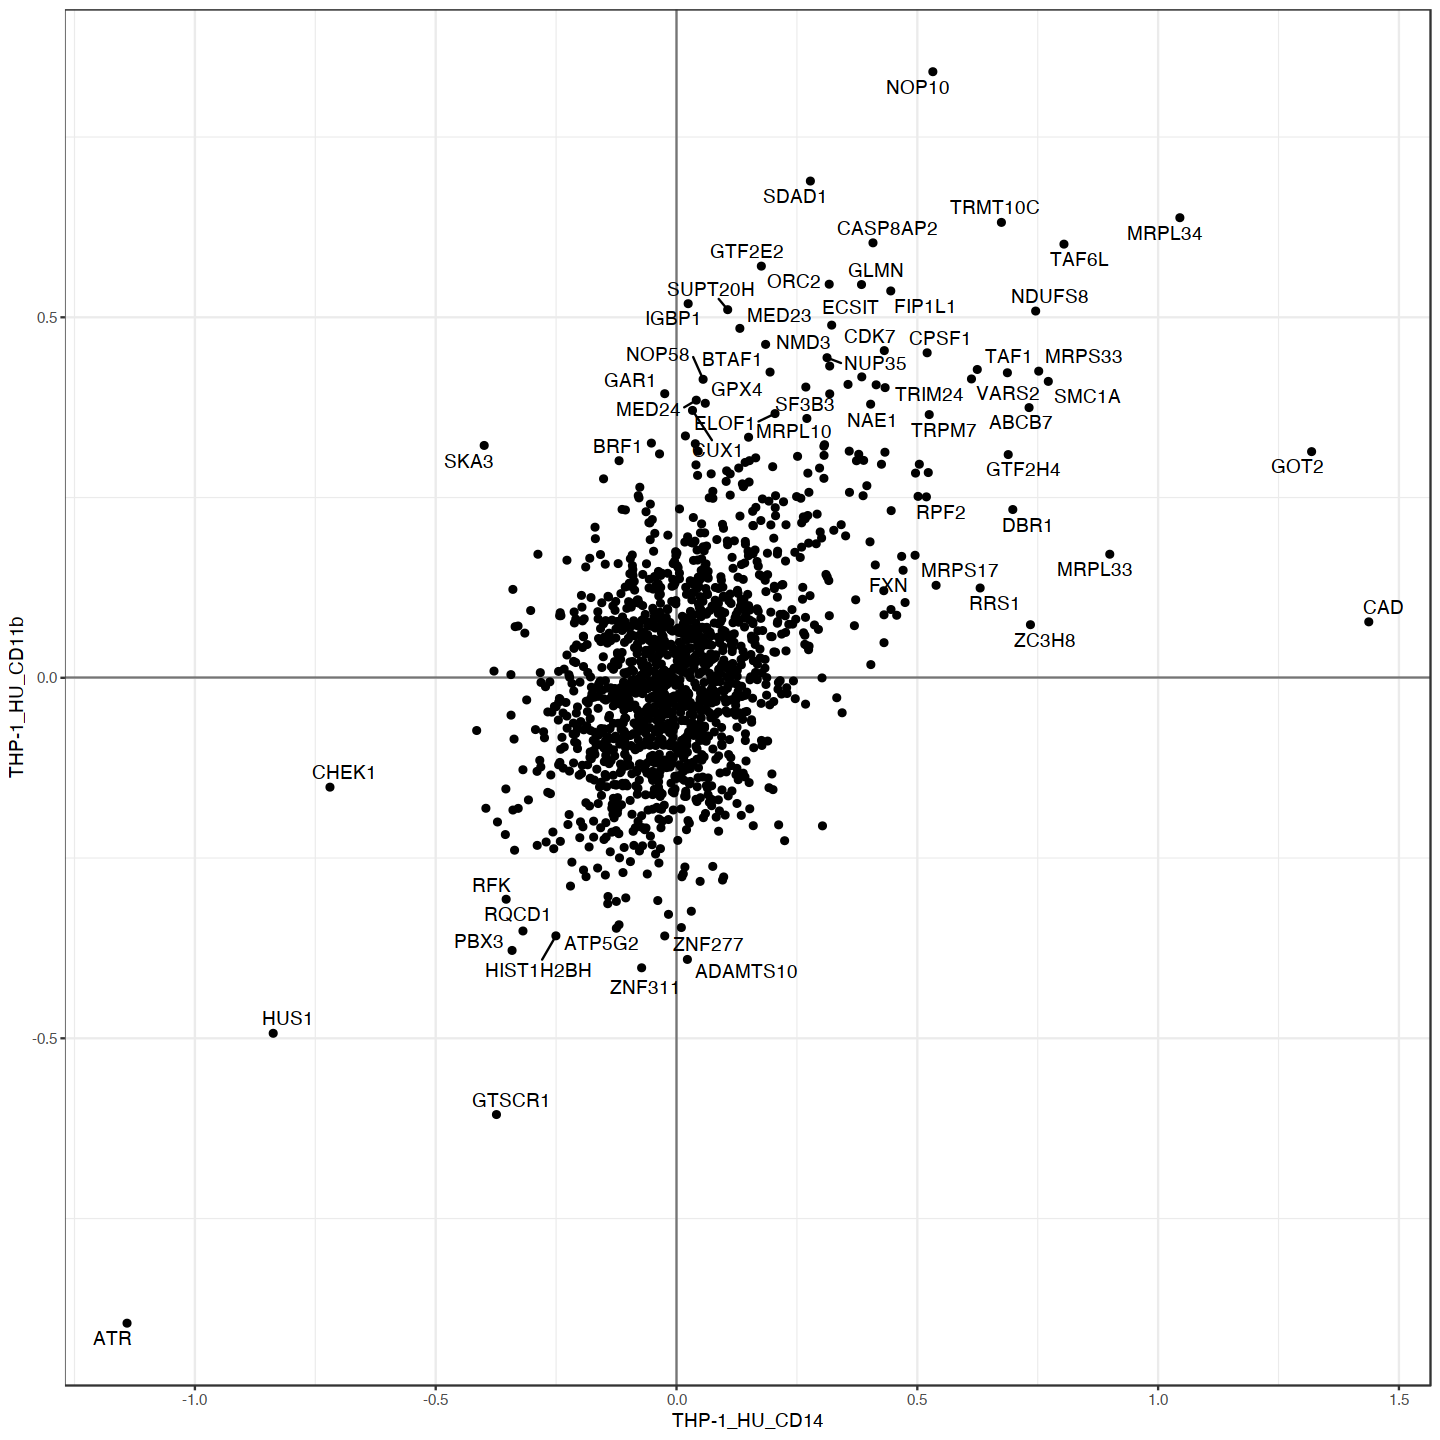

In [88]:
plot_dfs("THP-1_HU_CD14", "THP-1_HU_CD11b")

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Removed 103 rows containing missing values (geom_point).”
Warning message:
“Removed 103 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 1432 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


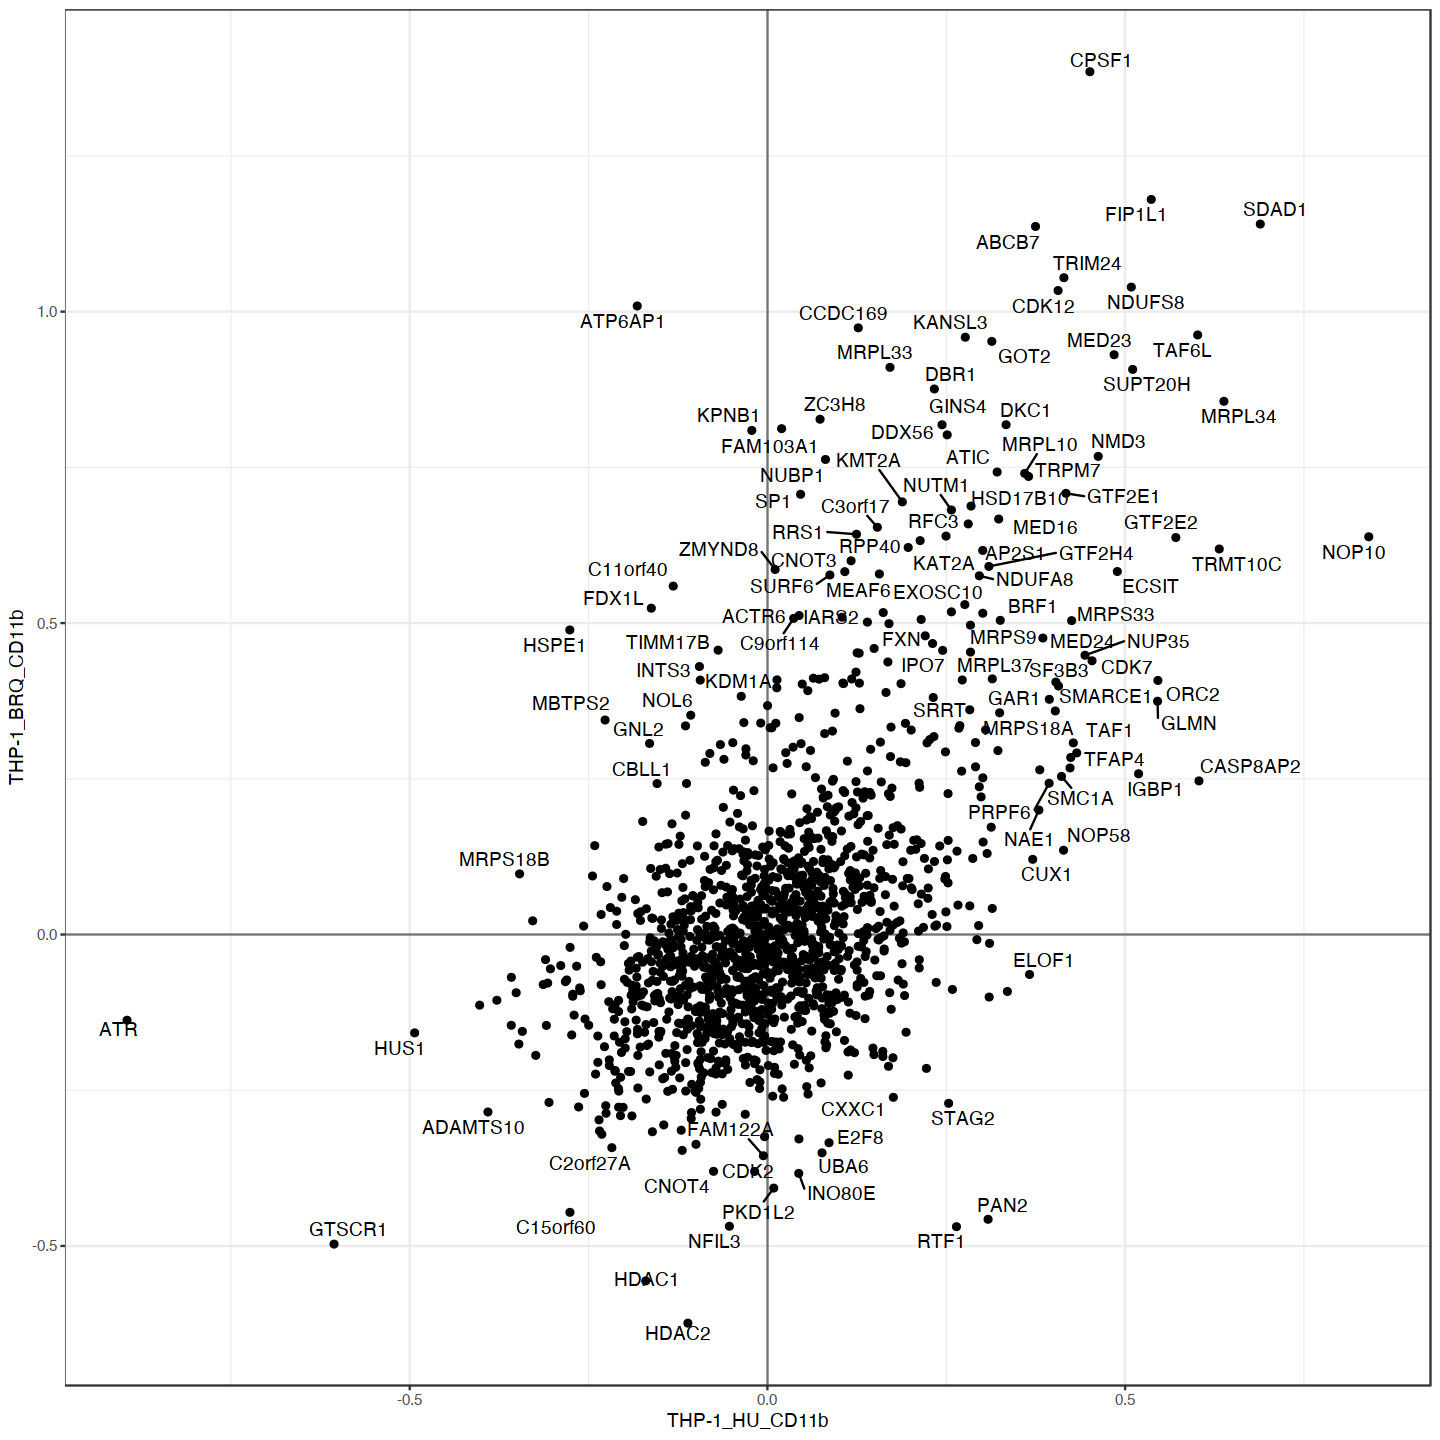

In [94]:
plot_dfs("THP-1_HU_CD11b", "THP-1_BRQ_CD11b")

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Removed 128 rows containing missing values (geom_point).”
Warning message:
“Removed 128 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 1428 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


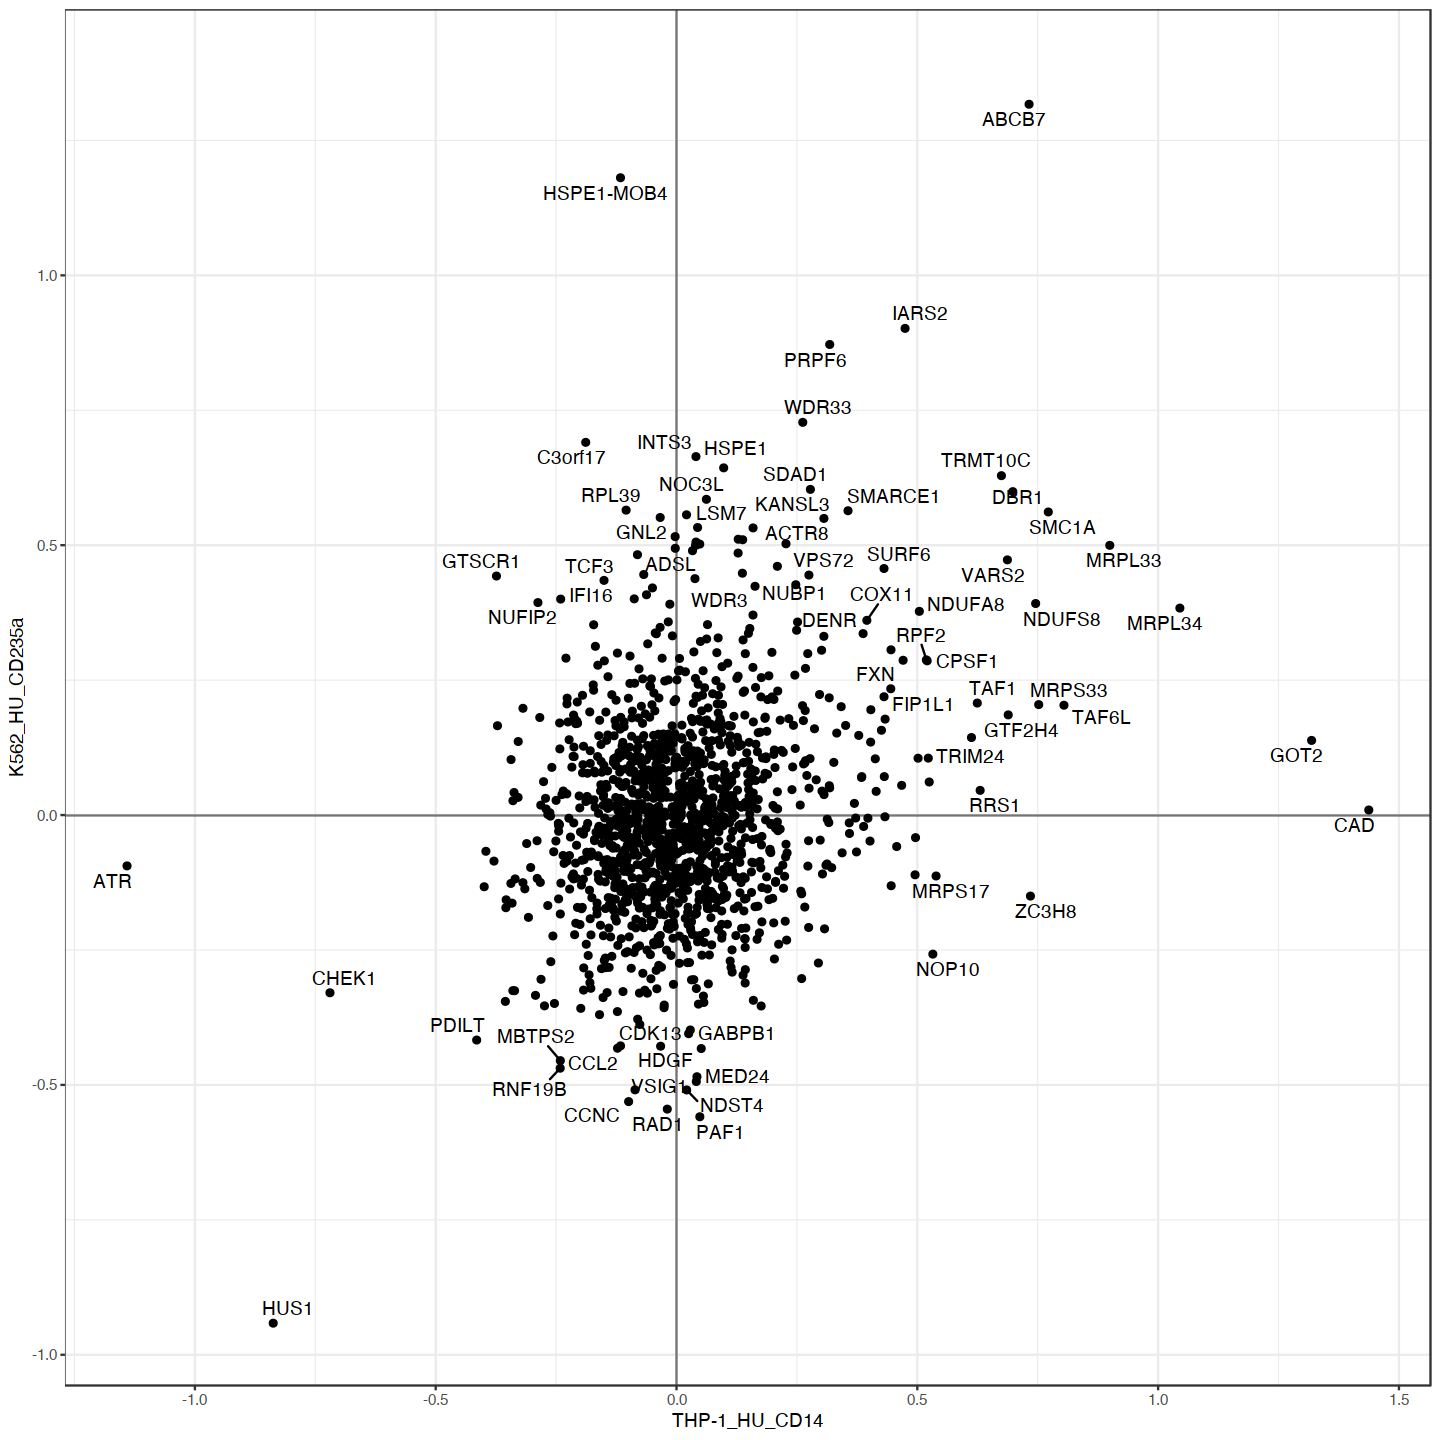

In [96]:
plot_dfs("THP-1_HU_CD14", "K562_HU_CD235a")

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Removed 127 rows containing missing values (geom_point).”
Warning message:
“Removed 127 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 1402 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


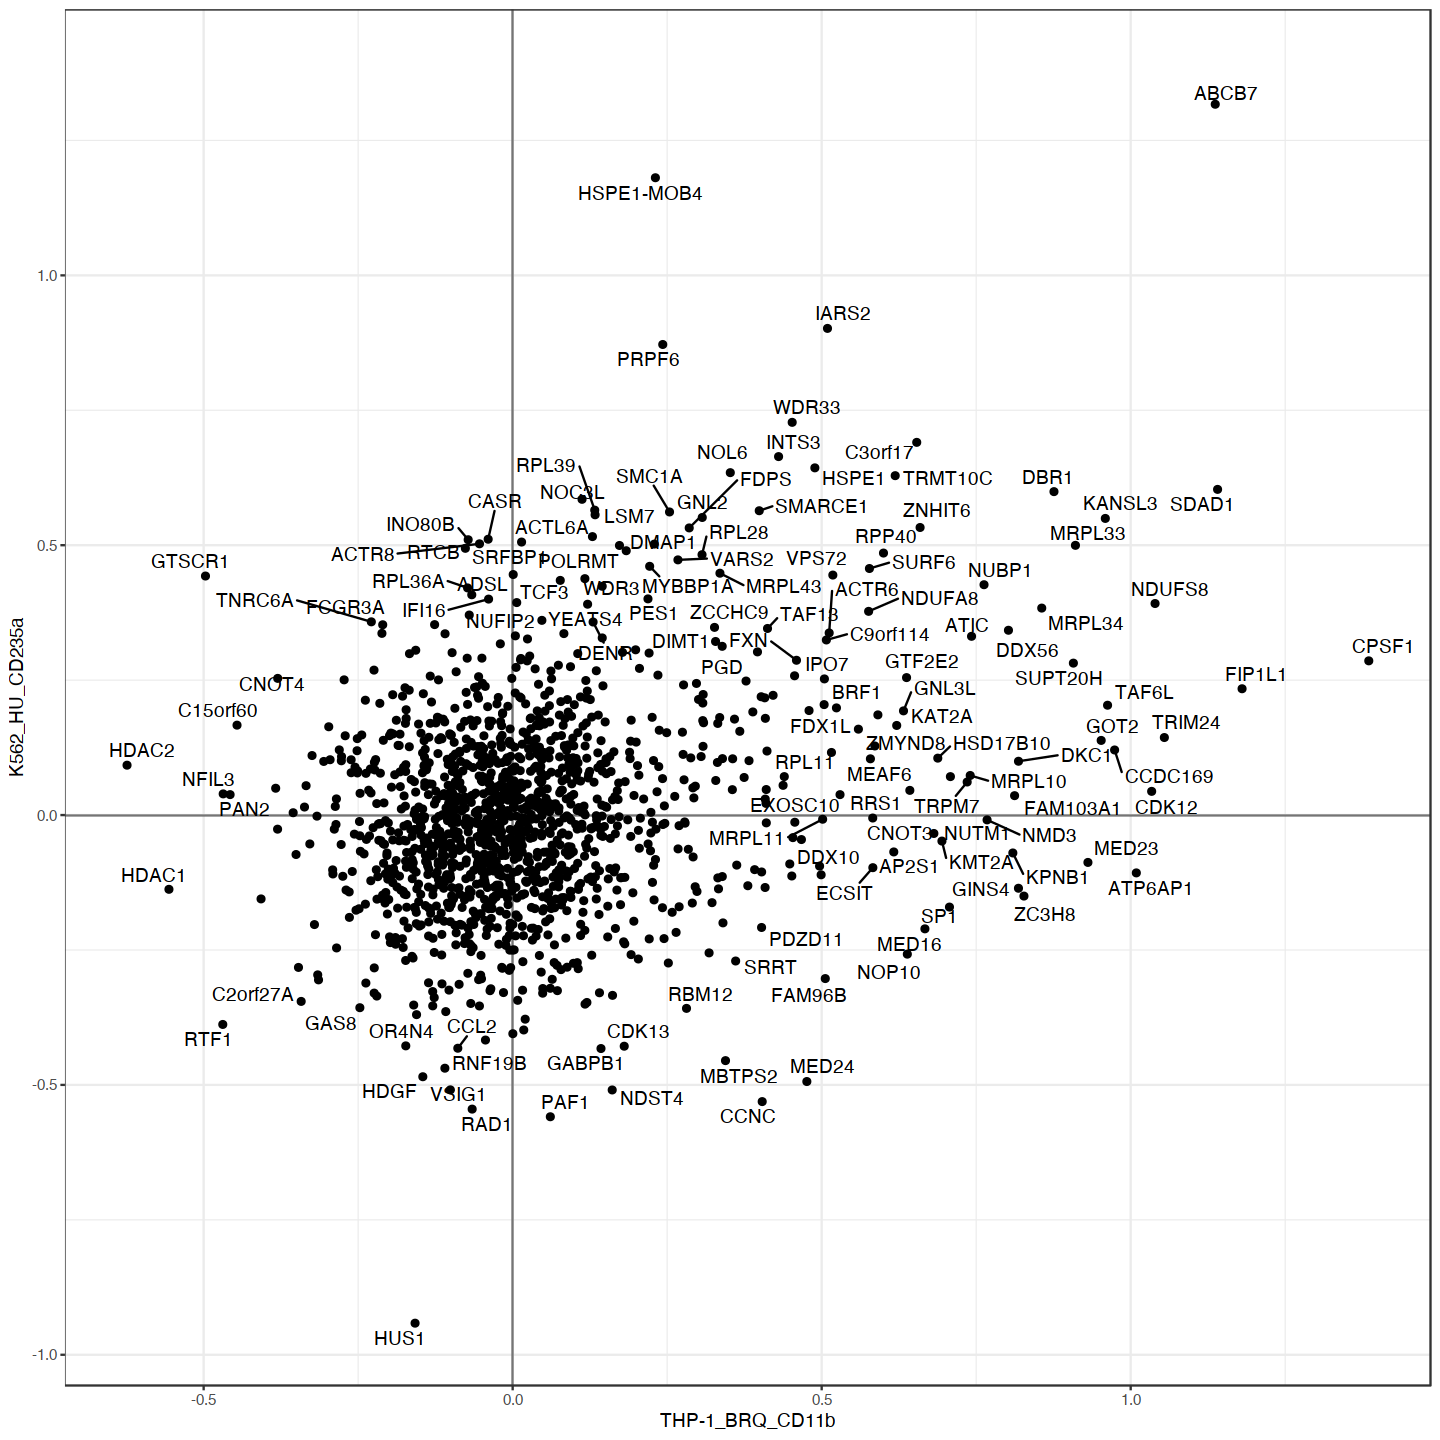

In [92]:
plot_dfs("THP-1_BRQ_CD11b", "K562_HU_CD235a")

In [93]:
z = subset(data_heatmap_melt, (gene == "HUS1") & (Var2 == "THP-1_BRQ_CD11b"))
z

data_heatmap_norm[z$Var1,]


Var1                    Var2            value       gene
56299 HUS1_+_48018777.23-P1P2 THP-1_BRQ_CD11b  0.06153379 HUS1
56300 HUS1_+_48018843.23-P1P2 THP-1_BRQ_CD11b  0.01651220 HUS1
56301 HUS1_+_48019118.23-P1P2 THP-1_BRQ_CD11b -0.06960065 HUS1
56302 HUS1_+_48019133.23-P1P2 THP-1_BRQ_CD11b -0.24621753 HUS1
56303 HUS1_+_48019171.23-P1P2 THP-1_BRQ_CD11b -0.27296025 HUS1
56304 HUS1_-_48018737.23-P1P2 THP-1_BRQ_CD11b  0.20764380 HUS1
56305 HUS1_-_48018747.23-P1P2 THP-1_BRQ_CD11b -0.43907223 HUS1
56306 HUS1_-_48019102.23-P1P2 THP-1_BRQ_CD11b  0.30371076 HUS1
56307 HUS1_-_48019152.23-P1P2 THP-1_BRQ_CD11b -0.43249688 HUS1
56308 HUS1_-_48019198.23-P1P2 THP-1_BRQ_CD11b -0.89378481 HUS1

K562_DMSO_CD235a K562_DMSO_CD61 K562_HU_CD235a
HUS1_+_48018777.23-P1P2  0.08535508      -0.09072432    -0.5943649    
HUS1_+_48018843.23-P1P2 -0.03490304       0.03407854    -0.4990553    
HUS1_+_48019118.23-P1P2  0.21842262      -0.25749497    -1.7228634    
HUS1_+_48019133.23-P1P2  0.32541341      -0.42086513    -1.7692794    
HUS1_+_48019171.23-P1P2  0.24184004      -0.29070915    -0.7687013    
HUS1_-_48018737.23-P1P2  0.13720147      -0.15163401    -1.1941480    
HUS1_-_48018747.23-P1P2  0.04918967      -0.05092621    -0.8159457    
HUS1_-_48019102.23-P1P2  0.21293175      -0.24989284    -1.0669908    
HUS1_-_48019152.23-P1P2  0.09575999      -0.10257089     0.3717476    
HUS1_-_48019198.23-P1P2  0.16500266      -0.18634093    -1.3902893    
                        THP-1_BRQ_CD11b THP-1_DMSO_CD11b THP-1_DMSO_CD14
HUS1_+_48018777.23-P1P2  0.06153379      0.25436736      -0.30902438    
HUS1_+_48018843.23-P1P2  0.01651220      0.07246004      -0.07629272    
HUS1_+_48019118.23-P1P2 -0.06960065      0.13595237      -0.15010950    
HUS1_+_48019133.23-P1P2 -0.24621753      0.26116734      -0.31913201    
HUS1_+_48019171.23-P1P2 -0.27296025      0.11375885      -0.12350272    
HUS1_-_48018737.23-P1P2  0.20764380      0.33549224      -0.43793172    
HUS1_-_48018747.23-P1P2 -0.43907223     -0.03501661       0.03418680    
HUS1_-_48019102.23-P1P2  0.30371076      0.06243331      -0.06525784    
HUS1_-_48019152.23-P1P2 -0.43249688     -0.31253728       0.25673973    
HUS1_-_48019198.23-P1P2 -0.89378481     -0.08489110       0.08017232    
                        THP-1_HU_CD11b THP-1_HU_CD14
HUS1_+_48018777.23-P1P2 -0.38449210    -0.6859042   
HUS1_+_48018843.23-P1P2 -0.73116766    -0.9337027   
HUS1_+_48019118.23-P1P2 -0.70536191    -0.4571999   
HUS1_+_48019133.23-P1P2 -0.85520470    -1.1910598   
HUS1_+_48019171.23-P1P2 -0.49981233    -1.2329752   
HUS1_-_48018737.23-P1P2 -0.24799802    -0.1648016   
HUS1_-_48018747.23-P1P2 -0.48637289    -0.7764677   
HUS1_-_48019102.23-P1P2 -0.10055651    -0.3827391   
HUS1_-_48019152.23-P1P2  0.02188795    -0.8983476   
HUS1_-_48019198.23-P1P2 -1.18145736    -1.5261472